## USALEEP

### US_A.csv

In [ ]:
import pandas as pd

# URL of the CSV file
url = "https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NVSS/USALEEP/CSV/US_A.CSV"

# Read the CSV file and enforce string type for 'Tract ID'
df = pd.read_csv(url, dtype={'Tract ID': str})

# Pad 'Tract ID' with leading zeros to ensure 11 characters
df['Tract ID'] = df['Tract ID'].astype(str).str.zfill(11)

df.rename(columns={'Tract ID': 'TRACTID'}, inplace=True)

# Display the first few rows
df.head()

,TRACTID,STATE2KX,CNTY2KX,TRACT2KX,e(0),se(e(0)),Abridged life table flag
0,01001020100,1,1,20100,73.1,2.2348,3
1,01001020200,1,1,20200,76.9,3.3453,3
2,01001020400,1,1,20400,75.4,1.0216,3
3,01001020500,1,1,20500,79.4,1.1768,1
4,01001020600,1,1,20600,73.1,1.5519,3


In [ ]:
df.to_csv("census_files/US_A.csv", index=False)

### US_B_cleaned.csv

In [ ]:
import pandas as pd
US_B=pd.read_csv("LE/US_B.csv", dtype=str)
US_B['Tract ID']=US_B['Tract ID'].str.zfill(11)
US_B['Tract ID'].astype(str).str.len().unique()

array([11])

In [ ]:
US_B['AGE_GROUP'] = US_B['Age Group'].astype(str)
US_B['AGE_GROUP'] = US_B['AGE_GROUP'].str.replace('–', '-', regex=False)

age_replace = {
    'Under 1': '0_0y',
    '1 to 4': '1_4y', '1-4': '1_4y', '4-Jan': '1_4y',
    '5 to 14': '5_14y', '5-14': '5_14y', '14-May': '5_14y',
    '15 to 24': '15_24y', '15-24': '15_24y',
    '25 to 34': '25_34y', '25-34': '25_34y',
    '35 to 44': '35_44y', '35-44': '35_44y',
    '45 to 54': '45_54y', '45-54': '45_54y',
    '55 to 64': '55_64y', '55-64': '55_64y',
    '65 to 74': '65_74y', '65-74': '65_74y',
    '75 to 84': '75_84y', '75-84': '75_84y',
    '85 and over': '85_upy', '85 and older': '85_upy'
}

US_B['AGE_GROUP'] = US_B['AGE_GROUP'].replace(age_replace)
US_B.drop(columns=['Age Group'], inplace=True)

US_B

,Tract ID,STATE2KX,CNTY2KX,TRACT2KX,nq(x),l(x),nd(x),nL(x),T(x),e(x),se(nq(x)),se(e(x)),AGE_GROUP
0,01001020100,1,1,20100,0.019736,100000,1974,98224,7306016,73.1,0.0219,2.2348,0_0y
1,01001020100,1,1,20100,0.008884,98026,871,390364,7207792,73.5,0.0091,1.5617,1_4y
2,01001020100,1,1,20100,0.00618,97156,600,968553,6817428,70.2,0.0062,1.4302,5_14y
3,01001020100,1,1,20100,0.008613,96555,832,961393,5848875,60.6,0.0014,1.379,15_24y
4,01001020100,1,1,20100,0.023923,95723,2290,945785,4887483,51.1,0.0143,1.3889,25_34y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
738623,56045951300,56,45,951300,0.028056,92226,2587,909320,3469702,37.6,0.0109,1.4415,45_54y
738624,56045951300,56,45,951300,0.088569,89638,7939,856687,2560381,28.6,0.018,1.4348,55_64y
738625,56045951300,56,45,951300,0.13315,81699,10878,762600,1703694,20.9,0.03,1.489,65_74y
738626,56045951300,56,45,951300,0.427227,70821,30257,556926,941094,13.3,0.0682,1.597,75_84y


In [ ]:
US_B.isna().sum()

Tract ID     0
STATE2KX     0
CNTY2KX      0
TRACT2KX     0
nq(x)        0
l(x)         0
nd(x)        0
nL(x)        0
T(x)         0
e(x)         0
se(nq(x))    0
se(e(x))     0
AGE_GROUP    0
dtype: int64

In [ ]:
US_B.columns

Index(['Tract ID', 'STATE2KX', 'CNTY2KX', 'TRACT2KX', 'nq(x)', 'l(x)', 'nd(x)',
       'nL(x)', 'T(x)', 'e(x)', 'se(nq(x))', 'se(e(x))', 'AGE_GROUP'],
      dtype='object')

In [ ]:
cols_to_convert = ['e(x)', 'nq(x)', 'l(x)', 'nd(x)', 'nL(x)', 'T(x)']
US_B[cols_to_convert] = US_B[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Step 1: Optional - Rename to match desired metric naming
US_B = US_B.rename(columns={
    'e(x)': 'E(X)', 'nq(x)': 'NQ(X)', 'l(x)': 'L(X)',
    'nd(x)': 'ND(X)', 'nL(x)': 'NL(X)', 'T(x)': 'T(X)'
})

# Step 2: Pivot to wide format
US_B_unstacked = US_B.pivot_table(
    index=['Tract ID', 'STATE2KX', 'CNTY2KX', 'TRACT2KX'],
    columns='AGE_GROUP',
    values=['E(X)', 'NQ(X)', 'L(X)', 'ND(X)', 'NL(X)', 'T(X)']
)

# Step 3: Flatten column MultiIndex
US_B_unstacked.columns = [f"{metric}_{age}" for metric, age in US_B_unstacked.columns]

# Step 4: Reset index
US_B_unstacked = US_B_unstacked.reset_index()

# Step 5: Reorder columns (if needed)
age_order_cleaned = ['0_0y', '1_4y', '5_14y', '15_24y', '25_34y', 
                     '35_44y', '45_54y', '55_64y', '65_74y', '75_84y', '85_upy']
metric_cols = ['E(X)', 'NQ(X)', 'L(X)', 'ND(X)', 'NL(X)', 'T(X)']
ordered_columns = [f"{metric}_{age}" for metric in metric_cols for age in age_order_cleaned]
id_cols = ['Tract ID', 'STATE2KX', 'CNTY2KX', 'TRACT2KX']
existing_cols = [col for col in ordered_columns if col in US_B_unstacked.columns]

# Final DataFrame
US_B_unstacked = US_B_unstacked[id_cols + existing_cols]

In [ ]:
US_B_unstacked

,Tract ID,STATE2KX,CNTY2KX,TRACT2KX,E(X)_0_0y,E(X)_1_4y,E(X)_5_14y,E(X)_15_24y,E(X)_25_34y,E(X)_35_44y,...,T(X)_1_4y,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy
0,01001020100,1,1,20100,73.1,73.5,70.2,60.6,51.1,42.2,...,7207792.0,6817428.0,5848875.0,4887483.0,3941698.0,3016853.0,2109683.0,1248794.0,519295.0,43836.0
1,01001020200,1,1,20200,76.9,76.5,73.2,63.3,53.6,44.1,...,7588518.0,7193761.0,6212033.0,5233396.0,4262218.0,3308993.0,2397798.0,1574590.0,920677.0,454035.0
2,01001020400,1,1,20400,75.4,74.7,70.8,61.0,51.1,41.7,...,7442030.0,7043938.0,6050410.0,5059453.0,4075826.0,3110818.0,2186050.0,1339959.0,623597.0,89213.0
3,01001020500,1,1,20500,79.4,78.8,74.9,65.0,55.2,45.6,...,7842101.0,7444293.0,6450815.0,5460188.0,4475742.0,3498520.0,2542308.0,1641108.0,856334.0,276271.0
4,01001020600,1,1,20600,73.1,73.3,69.4,59.5,50.5,41.3,...,7216421.0,6822952.0,5840465.0,4867724.0,3912177.0,2982509.0,2089265.0,1267951.0,564056.0,97673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67143,56043000200,56,43,200,80.1,80.5,76.8,66.9,57.3,49.2,...,7908169.0,7515964.0,6538123.0,5564177.0,4610786.0,3676500.0,2758164.0,1879524.0,1052013.0,384002.0
67144,56043000301,56,43,301,79.9,79.2,75.3,65.3,56.3,47.0,...,7885561.0,7487456.0,6493142.0,5506903.0,4535450.0,3587379.0,2688299.0,1845195.0,1096701.0,502612.0
67145,56043000302,56,43,302,81.8,81.2,77.3,67.3,57.9,49.3,...,8083852.0,7685918.0,6691878.0,5702962.0,4731323.0,3774762.0,2831406.0,1930229.0,1112936.0,467903.0
67146,56045951100,56,45,951100,79.0,78.3,74.4,64.5,55.0,45.6,...,7797428.0,7399428.0,6405458.0,5416020.0,4436784.0,3471935.0,2532271.0,1643508.0,858358.0,282140.0


In [ ]:
US_B_unstacked.to_csv("LE/US_B_cleaned.csv", index=False)

## Census Bureau 2010 P.L. 94-171

### census_pop10_merged.csv

In [ ]:
import zipfile
import os

# Unzip all files in the Census Bureau 2010 P.L. 94-171 directory
for file in os.listdir("Census Bureau 2010 P.L. 94-171"):
    if file.endswith(".zip"):
        file_path = os.path.join("Census Bureau 2010 P.L. 94-171", file)
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall("Census Bureau 2010 P.L. 94-171")
            print(f"Unzipped {file_path}")

print("All files unzipped!")

Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_41_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_55_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_17_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_36_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_22_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_47_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_53_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_29_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_08_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_30_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_24_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_05_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_11_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_54_pophu.zip
Unzipped Census Bureau 2010 P.L. 94-171/tabblock2010_40_pophu.zip
Unzipped C

In [2]:
!pip install dbfread

  Using cached dbfread-2.0.7-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached dbfread-2.0.7-py2.py3-none-any.whl (20 kB)


In [1]:
import os
import pandas as pd
from dbfread import DBF

# Define the folder containing the .dbf files
folder_path = "Census Bureau 2010 P.L. 94-171"

# Get a list of all .dbf files in the folder
dbf_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".dbf")]

# Initialize an empty list to store DataFrames
df_list = []

# Read each .dbf file and append its DataFrame to the list
for dbf_file in dbf_files:
    dbf_table = DBF(dbf_file)
    df = pd.DataFrame(iter(dbf_table))
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

# Display the merged DataFrame
merged_df

# Optionally, save the merged DataFrame to a CSV file
# merged_df.to_csv("merged_dbf_data.csv", index=False)

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10
0,38,001,965600,2110,380019656002110,N,0,0
1,38,001,965600,2080,380019656002080,N,0,0
2,38,001,965600,2057,380019656002057,N,0,0
3,38,001,965600,2092,380019656002092,N,0,0
4,38,001,965600,2066,380019656002066,N,0,0
...,...,...,...,...,...,...,...,...
11078292,05,149,952500,1042,051499525001042,N,0,0
11078293,05,149,952401,1015,051499524011015,N,0,0
11078294,05,149,952402,1042,051499524021042,N,4,4
11078295,05,149,952500,3089,051499525003089,N,0,0


In [2]:
merged_df.describe(include='all')

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10
count,11078297,11078297,11078297,11078297,11078297,11078297,1.107830e+07,1.107830e+07
unique,51,324,23818,7070,11078297,1,NaN,NaN
top,48,031,950100,1000,380019656002110,N,NaN,NaN
freq,914231,271330,224353,72739,1,11078297,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.188854e+01,2.786940e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,3.380024e+01,7.859192e+01
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,3.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+01,2.700000e+01


In [ ]:
merged_df.to_csv("census_pop10_merged.csv", index=False)

## master_ct10usaleep

### master_ct10usaleep_new.csv

In [ ]:
import os
import glob
import pandas as pd

# Get a list of all .txt files ending with SDSEC.txt and SDELM.txt in the census_files directory
sdsec_files = glob.glob(os.path.join("census_files", "*SDSEC.txt"))
sdelm_files = glob.glob(os.path.join("census_files", "*SDELM.txt"))
sduni_files = glob.glob(os.path.join("census_files", "*SDUNI.txt"))

# Read all SDSEC.txt, SDELM.txt and SDUNI.txt files into DataFrames
sdsec_df = pd.concat([pd.read_csv(f, delimiter=',', dtype=str) for f in sdsec_files], ignore_index=True)
sdelm_df = pd.concat([pd.read_csv(f, delimiter=',', dtype=str) for f in sdelm_files], ignore_index=True)
sduni_df = pd.concat([pd.read_csv(f, delimiter=',', dtype=str) for f in sduni_files], ignore_index=True)

In [ ]:
# Union of BLOCKID columns from sdsec_df, sdelm_df, and sduni_df
master_df = pd.concat([sdsec_df[['BLOCKID']], sdelm_df[['BLOCKID']], sduni_df[['BLOCKID']]]).drop_duplicates().reset_index(drop=True)

# Display the result
master_df.describe()

,BLOCKID
count,11155486
unique,11155486
top,280010001001000
freq,1


In [ ]:
master_df = master_df.merge(sduni_df[['BLOCKID', 'DISTRICT']], on='BLOCKID', how='left')
master_df.rename(columns={'DISTRICT': 'SDUNI'}, inplace=True)
master_df.head()

,BLOCKID,SDUNI
0,280010001001000,03030
1,280010001001001,03030
2,280010001001002,03030
3,280010001001003,03030
4,280010001001004,03030


In [ ]:
master_df = master_df.merge(sdelm_df[['BLOCKID', 'DISTRICT']], on='BLOCKID', how='left')
master_df.rename(columns={'DISTRICT': 'SDELM'}, inplace=True)
master_df.head()

,BLOCKID,SDUNI,SDELM
0,280010001001000,03030,NaN
1,280010001001001,03030,NaN
2,280010001001002,03030,NaN
3,280010001001003,03030,NaN
4,280010001001004,03030,NaN


In [ ]:
master_df = master_df.merge(sdsec_df[['BLOCKID', 'DISTRICT']], on='BLOCKID', how='left')
master_df.rename(columns={'DISTRICT': 'SDSEC'}, inplace=True)
master_df.head()

,BLOCKID,SDUNI,SDELM,SDSEC
0,280010001001000,03030,NaN,NaN
1,280010001001001,03030,NaN,NaN
2,280010001001002,03030,NaN,NaN
3,280010001001003,03030,NaN,NaN
4,280010001001004,03030,NaN,NaN


In [ ]:
master_df.describe()

,BLOCKID,SDUNI,SDELM,SDSEC
count,11155486,10423316,732170,632917
unique,11155486,3230,1255,476
top,280010001001000,00030,01710,19540
freq,1,151117,7262,15440


In [ ]:
master_ct10=master_df[['BLOCKID', 'SDUNI', 'SDELM', 'SDSEC']]
master_ct10.drop_duplicates(inplace=True)
master_ct10

,BLOCKID,SDUNI,SDELM,SDSEC
0,280010001001000,03030,NaN,NaN
1,280010001001001,03030,NaN,NaN
2,280010001001002,03030,NaN,NaN
3,280010001001003,03030,NaN,NaN
4,280010001001004,03030,NaN,NaN
...,...,...,...,...
11155481,500279667004069,07530,NaN,NaN
11155482,500279667004070,07530,NaN,NaN
11155483,500279667004071,07530,NaN,NaN
11155484,500279667004072,07530,NaN,NaN


In [ ]:
master_ct10['TRACTID']=master_ct10['BLOCKID'].str[:11]

In [ ]:
df = pd.read_csv("census_files/US_A.csv", dtype={'TRACTID': str})

In [ ]:
master_ct10usaleep=master_ct10.merge(df, left_on='TRACTID', right_on='TRACTID', how='left')
master_ct10usaleep.drop(columns=['STATE2KX','CNTY2KX','TRACT2KX','se(e(0))','Abridged life table flag'], inplace=True)
master_ct10usaleep.rename(columns={'e(0)':'USALEEP'}, inplace=True)
master_ct10usaleep=master_ct10usaleep[['BLOCKID','TRACTID', 'SDUNI', 'SDELM', 'SDSEC','USALEEP']]
master_ct10usaleep

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,USALEEP
0,280010001001000,28001000100,03030,NaN,NaN,78.5
1,280010001001001,28001000100,03030,NaN,NaN,78.5
2,280010001001002,28001000100,03030,NaN,NaN,78.5
3,280010001001003,28001000100,03030,NaN,NaN,78.5
4,280010001001004,28001000100,03030,NaN,NaN,78.5
...,...,...,...,...,...,...
11155481,500279667004069,50027966700,07530,NaN,NaN,78.4
11155482,500279667004070,50027966700,07530,NaN,NaN,78.4
11155483,500279667004071,50027966700,07530,NaN,NaN,78.4
11155484,500279667004072,50027966700,07530,NaN,NaN,78.4


In [ ]:
master_ct10usaleep['SDUNI']=master_ct10usaleep['BLOCKID'].str[:2]+master_ct10usaleep['SDUNI']
master_ct10usaleep['SDELM']=master_ct10usaleep['BLOCKID'].str[:2]+master_ct10usaleep['SDELM']
master_ct10usaleep['SDSEC']=master_ct10usaleep['BLOCKID'].str[:2]+master_ct10usaleep['SDSEC']

In [ ]:
master_ct10usaleep

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,USALEEP
0,280010001001000,28001000100,2803030,NaN,NaN,78.5
1,280010001001001,28001000100,2803030,NaN,NaN,78.5
2,280010001001002,28001000100,2803030,NaN,NaN,78.5
3,280010001001003,28001000100,2803030,NaN,NaN,78.5
4,280010001001004,28001000100,2803030,NaN,NaN,78.5
...,...,...,...,...,...,...
11155481,500279667004069,50027966700,5007530,NaN,NaN,78.4
11155482,500279667004070,50027966700,5007530,NaN,NaN,78.4
11155483,500279667004071,50027966700,5007530,NaN,NaN,78.4
11155484,500279667004072,50027966700,5007530,NaN,NaN,78.4


In [ ]:
master_ct10usaleep.describe(include='all')

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,USALEEP
count,11155486,11155486,10423316,732170,632917,1.050809e+07
unique,11155486,74002,10892,2304,514,NaN
top,280010001001000,16015950200,7200030,0409600,0619540,NaN
freq,1,3449,77189,4895,15440,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.830014e+01
std,NaN,NaN,NaN,NaN,NaN,3.792431e+00
min,NaN,NaN,NaN,NaN,NaN,5.630000e+01
25%,NaN,NaN,NaN,NaN,NaN,7.580000e+01
50%,NaN,NaN,NaN,NaN,NaN,7.840000e+01
75%,NaN,NaN,NaN,NaN,NaN,8.080000e+01


In [16]:
census_pop10_merged=pd.read_csv("census_pop10_merged.csv", dtype=str)

In [17]:
census_pop10_merged.describe(include='all')

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10
count,11078297,11078297,11078297,11078297,11078297,11078297,11078297,11078297
unique,51,324,23818,7070,11078297,1,1370,2649
top,48,031,950100,1000,380019656002110,N,0,0
freq,914231,271330,224353,72739,1,11078297,4698334,4871270


In [18]:
# Extract the unique state codes from master_ct10usaleep['BLOCKID']
master_state_codes = master_ct10usaleep['BLOCKID'].str[:2].unique()

# Extract the unique state codes from census_pop10_merged['STATEFP10']
census_pop10_state_codes = census_pop10_merged['STATEFP10'].unique()

# Compare the two sets of state codes
common_state_codes = set(master_state_codes).intersection(set(census_pop10_state_codes))
unique_to_master = set(master_state_codes) - set(census_pop10_state_codes)
unique_to_census = set(census_pop10_state_codes) - set(master_state_codes)

print("Common state codes:", common_state_codes)
print("State codes unique to master_ct10usaleep:", unique_to_master)
print("State codes unique to census_pop10_merged:", unique_to_census)

Common state codes: {'55', '18', '40', '13', '28', '11', '21', '45', '05', '37', '31', '44', '27', '24', '15', '49', '22', '54', '19', '47', '01', '25', '12', '36', '33', '02', '48', '50', '53', '32', '04', '39', '17', '34', '16', '23', '42', '38', '06', '51', '46', '29', '08', '26', '35', '20', '10', '41', '30', '09', '56'}
State codes unique to master_ct10usaleep: {'72'}
State codes unique to census_pop10_merged: set()


In [19]:
# Perform a left join on BLOCKID
master_ct10usaleep = master_ct10usaleep.merge(census_pop10_merged[['BLOCKID10', 'POP10']], left_on='BLOCKID', right_on='BLOCKID10', how='left')

# Display the updated DataFrame
master_ct10usaleep

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,USALEEP,BLOCKID10,POP10
0,280010001001000,28001000100,2803030,NaN,NaN,78.5,280010001001000,9
1,280010001001001,28001000100,2803030,NaN,NaN,78.5,280010001001001,0
2,280010001001002,28001000100,2803030,NaN,NaN,78.5,280010001001002,3
3,280010001001003,28001000100,2803030,NaN,NaN,78.5,280010001001003,4
4,280010001001004,28001000100,2803030,NaN,NaN,78.5,280010001001004,18
...,...,...,...,...,...,...,...,...
11155481,500279667004069,50027966700,5007530,NaN,NaN,78.4,500279667004069,0
11155482,500279667004070,50027966700,5007530,NaN,NaN,78.4,500279667004070,0
11155483,500279667004071,50027966700,5007530,NaN,NaN,78.4,500279667004071,15
11155484,500279667004072,50027966700,5007530,NaN,NaN,78.4,500279667004072,4


312,471,327 being the USA + Puerto Rico’s population as per the 2010 Census records

In [20]:
total_pop10_census = census_pop10_merged['POP10'].astype(int).sum()
print(f"Total POP10: {total_pop10_census}")

Total POP10: 308745538


In [21]:
# Fill NaN values with 0 before converting to integers
updated_master_ct10usaleep = master_ct10usaleep['POP10'].fillna(0).astype(int)

total_pop10 = updated_master_ct10usaleep.sum()
print(f"Total POP10: {total_pop10}")

Total POP10: 308745538


In [22]:
empty_blockid10 = master_ct10usaleep[master_ct10usaleep['BLOCKID10'].isnull()]
empty_blockid10

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,USALEEP,BLOCKID10,POP10
1993892,720019563001000,72001956300,7200030,NaN,NaN,NaN,NaN,NaN
1993893,720019563001001,72001956300,7200030,NaN,NaN,NaN,NaN,NaN
1993894,720019563001002,72001956300,7200030,NaN,NaN,NaN,NaN,NaN
1993895,720019563001003,72001956300,7200030,NaN,NaN,NaN,NaN,NaN
1993896,720019563001004,72001956300,7200030,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2071076,721537506022019,72153750602,7200030,NaN,NaN,NaN,NaN,NaN
2071077,721537506022020,72153750602,7200030,NaN,NaN,NaN,NaN,NaN
2071078,721537506022021,72153750602,7200030,NaN,NaN,NaN,NaN,NaN
2071079,721537506022022,72153750602,7200030,NaN,NaN,NaN,NaN,NaN


In [23]:
empty_blockid10['BLOCKID'].str[:2].unique()

array(['72'], dtype=object)

In [24]:
master_ct10usaleep.drop(columns=['BLOCKID10'], inplace=True)

master_ct10usaleep = master_ct10usaleep[['BLOCKID', 'TRACTID', 'SDUNI', 'SDELM', 'SDSEC', 'POP10', 'USALEEP']]

In [25]:
master_ct10usaleep.describe(include='all')

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP
count,11155486,11155486,10423316,732170,632917,11078297,1.050809e+07
unique,11155486,74002,10892,2304,514,2649,NaN
top,280010001001000,16015950200,7200030,0409600,0619540,0,NaN
freq,1,3449,77189,4895,15440,4871270,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.830014e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,3.792431e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,5.630000e+01
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.580000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.840000e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.080000e+01


In [ ]:
master_ct10usaleep.to_csv("master_ct10usaleep_new.csv", index=False)

### master_ct10usaleep_noPR.csv

In [ ]:
import pandas as pd
dtype={'BLOCKID':str, 'TRACTID':str, 'TRACTID':str, 'SDELM':str, 'SDSEC':str, 'SDUNI':str}
master_ct10usaleep=pd.read_csv("master_ct10usaleep_new.csv", dtype=dtype)

In [ ]:
master_ct10usaleep['BLOCKID'] = master_ct10usaleep['BLOCKID'].astype(str)
master_ct10usaleep_noPR=master_ct10usaleep[~master_ct10usaleep['BLOCKID'].str.startswith('72')]

In [ ]:
master_ct10usaleep_noPR.describe(include='all')

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP
count,11078297,11078297,10346127,732170,632917,1.107830e+07,1.050809e+07
unique,11078297,73057,10891,2304,514,NaN,NaN
top,280010001001000,16015950200,1709930,0409600,0619540,NaN,NaN
freq,1,3449,46311,4895,15440,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.786940e+01,7.830014e+01
std,NaN,NaN,NaN,NaN,NaN,7.859192e+01,3.792431e+00
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,5.630000e+01
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,7.580000e+01
50%,NaN,NaN,NaN,NaN,NaN,3.000000e+00,7.840000e+01
75%,NaN,NaN,NaN,NaN,NaN,2.700000e+01,8.080000e+01


In [ ]:
master_ct10usaleep_noPR.isnull().sum()

BLOCKID           0
TRACTID           0
SDUNI        732170
SDELM      10346127
SDSEC      10445380
POP10             0
USALEEP      570207
dtype: int64

In [ ]:
master_ct10usaleep_noPR['POP10'].sum()

308745538.0

In [ ]:
master_ct10usaleep_noPR[master_ct10usaleep_noPR['POP10']>0].describe(include='all')

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP
count,6207027,6207027,5812446,394581,349853,6.207027e+06,5.953150e+06
unique,6207027,72531,10869,2304,514,NaN,NaN
top,280010001001000,12115002712,1709930,0409600,0619540,NaN,NaN
freq,1,1298,36879,2614,7427,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.974129e+01,7.821901e+01
std,NaN,NaN,NaN,NaN,NaN,9.968057e+01,3.831283e+00
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,5.630000e+01
25%,NaN,NaN,NaN,NaN,NaN,8.000000e+00,7.580000e+01
50%,NaN,NaN,NaN,NaN,NaN,2.300000e+01,7.830000e+01
75%,NaN,NaN,NaN,NaN,NaN,5.400000e+01,8.070000e+01


In [ ]:
master_ct10usaleep_noPR[master_ct10usaleep_noPR['POP10']>0].isnull().sum()

BLOCKID          0
TRACTID          0
SDUNI       394581
SDELM      5812446
SDSEC      5857174
POP10            0
USALEEP     253877
dtype: int64

In [ ]:
master_ct10usaleep_noPR.to_csv("master_ct10usaleep_noPR.csv", index=False)

### master_ct10usaleep_noPR_ppop10.csv

In [ ]:
master_ct10usaleep_noPR[master_ct10usaleep_noPR['POP10']>0].to_csv("master_ct10usaleep_noPR_ppop10.csv", index=False)

### master_ct10usaleep_noPR_detailed.csv

In [ ]:
import requests

url = "https://www2.census.gov/geo/docs/reference/codes/files/national_schdist.txt"
response = requests.get(url)

with open("national_schdist.txt", "wb") as f:
    f.write(response.content)

print("Download complete.")

Download complete.


In [ ]:
import pandas as pd

# Read the file
national_schdist_df = pd.read_csv(
    "national_schdist.txt",
    delimiter=',',
    encoding='latin1',
    dtype=str,
    on_bad_lines='skip'
)

# Preview
national_schdist_df.head()

,STATE,STATEFP,LEA,SDNAME,TYPE
0,AL,01,00001,Fort Rucker School District,Unified
1,AL,01,00003,Maxwell AFB School District,Unified
2,AL,01,00005,Albertville City School District,Unified
3,AL,01,00006,Marshall County School District,Unified
4,AL,01,00007,Hoover City School District,Unified


In [ ]:
import requests

url = "https://www2.census.gov/geo/docs/reference/codes/files/national_county.txt"
response = requests.get(url)

with open("national_county.txt", "wb") as f:
    f.write(response.content)

In [ ]:
national_county_df = pd.read_csv("national_county.txt", header=None, names=['STATE', 'STATEFP', 'COUNTYFP', 'COUNTYNAME', 'CLASSFP'], dtype=str)
national_county_df.head()

,STATE,STATEFP,COUNTYFP,COUNTYNAME,CLASSFP
0,AL,01,001,Autauga County,H1
1,AL,01,003,Baldwin County,H1
2,AL,01,005,Barbour County,H1
3,AL,01,007,Bibb County,H1
4,AL,01,009,Blount County,H1


In [ ]:
# Step 1: Create key columns for joining
master_ct10usaleep_noPR['STATE_COUNTY'] = master_ct10usaleep_noPR['STATE'].astype(str).str.zfill(2) + master_ct10usaleep_noPR['COUNTY']
national_county_df['STATE_COUNTY'] = national_county_df['STATEFP'].astype(str).str.zfill(2) + national_county_df['COUNTYFP']

# Step 2: Rename 'STATE' to 'STATENAME' in county DataFrame
national_county_df = national_county_df.rename(columns={'STATE': 'STATENAME'})

# Step 3: Merge with state and county name
merged_df = master_ct10usaleep_noPR.merge(
    national_county_df[['STATE_COUNTY', 'STATENAME', 'COUNTYNAME']],
    on='STATE_COUNTY',
    how='left'
)

# Step 4: Drop intermediate key if not needed
merged_df.drop(columns=['STATE_COUNTY'], inplace=True)

# Show result
merged_df.head()

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,COUNTYNAME
0,280010001001000,28001000100,2803030,NaN,NaN,9.0,78.5,28,001,MS,Adams County
1,280010001001001,28001000100,2803030,NaN,NaN,0.0,78.5,28,001,MS,Adams County
2,280010001001002,28001000100,2803030,NaN,NaN,3.0,78.5,28,001,MS,Adams County
3,280010001001003,28001000100,2803030,NaN,NaN,4.0,78.5,28,001,MS,Adams County
4,280010001001004,28001000100,2803030,NaN,NaN,18.0,78.5,28,001,MS,Adams County


In [ ]:
# Step 1: Create full district codes (STATEFP + LEA)
national_schdist_df['SDCODE'] = national_schdist_df['STATEFP'].astype(str).str.zfill(2) + national_schdist_df['LEA'].astype(str).str.zfill(5)

# Step 2: Prepare separate tables for each district type
unified_df = national_schdist_df[national_schdist_df['TYPE'] == 'Unified'][['SDCODE', 'SDNAME']].rename(columns={
    'SDCODE': 'SDUNI', 'SDNAME': 'SDUNI_NAME'
})

elementary_df = national_schdist_df[national_schdist_df['TYPE'] == 'Elementary'][['SDCODE', 'SDNAME']].rename(columns={
    'SDCODE': 'SDELM', 'SDNAME': 'SDELM_NAME'
})

secondary_df = national_schdist_df[national_schdist_df['TYPE'] == 'Secondary'][['SDCODE', 'SDNAME']].rename(columns={
    'SDCODE': 'SDSEC', 'SDNAME': 'SDSEC_NAME'
})

# Merge SDUNI (Unified)
merged_df = merged_df.merge(unified_df, on='SDUNI', how='left')

# Merge SDELM (Elementary)
merged_df = merged_df.merge(elementary_df, on='SDELM', how='left')

# Merge SDSEC (Secondary)
merged_df = merged_df.merge(secondary_df, on='SDSEC', how='left')

# Show result
merged_df.head()

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,COUNTYNAME,SDUNI_NAME,SDELM_NAME,SDSEC_NAME
0,280010001001000,28001000100,2803030,NaN,NaN,9.0,78.5,28,001,MS,Adams County,Natchez-Adams School District,NaN,NaN
1,280010001001001,28001000100,2803030,NaN,NaN,0.0,78.5,28,001,MS,Adams County,Natchez-Adams School District,NaN,NaN
2,280010001001002,28001000100,2803030,NaN,NaN,3.0,78.5,28,001,MS,Adams County,Natchez-Adams School District,NaN,NaN
3,280010001001003,28001000100,2803030,NaN,NaN,4.0,78.5,28,001,MS,Adams County,Natchez-Adams School District,NaN,NaN
4,280010001001004,28001000100,2803030,NaN,NaN,18.0,78.5,28,001,MS,Adams County,Natchez-Adams School District,NaN,NaN


In [ ]:
merged_df.to_csv("master_ct10usaleep_noPR_detailed.csv", index=False)

In [ ]:
merged_df.describe(include='all')

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,COUNTYNAME,SDUNI_NAME,SDELM_NAME,SDSEC_NAME
count,11078297,11078297,10346127,732170,632917,1.107830e+07,1.050809e+07,11078297,11078297,11078297,11078297,10346127,731880,632917
unique,11078297,73057,10891,2304,514,NaN,NaN,51,324,51,1877,10355,2235,514
top,280010001001000,16015950200,1709930,0409600,0619540,NaN,NaN,48,031,TX,Jefferson County,Chicago Public School District 299,Yuma Elementary District,Kern Union High School District
freq,1,3449,46311,4895,15440,NaN,NaN,914231,271330,914231,124184,46311,4895,15440
mean,NaN,NaN,NaN,NaN,NaN,2.786940e+01,7.830014e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7.859192e+01,3.792431e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,5.630000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,7.580000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000e+00,7.840000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.700000e+01,8.080000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## school_district_summary_le

### school_district_summary_le_weighted_new_ppop.csv

In [ ]:
import pandas as pd
master_ct10usaleep_noPR_detailed=pd.read_csv("master_ct10usaleep_noPR_detailed.csv", dtype=str)
master_ct10usaleep_noPR_detailed['POP10'] = pd.to_numeric(master_ct10usaleep_noPR_detailed['POP10'], errors='coerce')
master_ct10usaleep_noPR_detailed

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,COUNTYNAME,SDUNI_NAME,SDELM_NAME,SDSEC_NAME
0,280010001001000,28001000100,2803030,NaN,NaN,9.0,78.5,28,001,MS,Adams County,Natchez-Adams School District,NaN,NaN
1,280010001001001,28001000100,2803030,NaN,NaN,0.0,78.5,28,001,MS,Adams County,Natchez-Adams School District,NaN,NaN
2,280010001001002,28001000100,2803030,NaN,NaN,3.0,78.5,28,001,MS,Adams County,Natchez-Adams School District,NaN,NaN
3,280010001001003,28001000100,2803030,NaN,NaN,4.0,78.5,28,001,MS,Adams County,Natchez-Adams School District,NaN,NaN
4,280010001001004,28001000100,2803030,NaN,NaN,18.0,78.5,28,001,MS,Adams County,Natchez-Adams School District,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11078292,500279667004069,50027966700,5007530,NaN,NaN,0.0,78.4,50,027,VT,Windsor County,Springfield School District,NaN,NaN
11078293,500279667004070,50027966700,5007530,NaN,NaN,0.0,78.4,50,027,VT,Windsor County,Springfield School District,NaN,NaN
11078294,500279667004071,50027966700,5007530,NaN,NaN,15.0,78.4,50,027,VT,Windsor County,Springfield School District,NaN,NaN
11078295,500279667004072,50027966700,5007530,NaN,NaN,4.0,78.4,50,027,VT,Windsor County,Springfield School District,NaN,NaN


In [ ]:
# Step 1: Unpivot SDID columns along with SDNAMEs
id_vars = [col for col in master_ct10usaleep_noPR_detailed.columns if col not in ['SDUNI', 'SDELM', 'SDSEC', 'SDUNI_NAME', 'SDELM_NAME', 'SDSEC_NAME']]
melted = master_ct10usaleep_noPR_detailed.melt(
    id_vars=id_vars,
    value_vars=['SDUNI', 'SDELM', 'SDSEC'],
    var_name='SDTYPE',
    value_name='SDID'
)

# Step 2: Map SDNAME based on SDTYPE
sdname_map = {
    'SDUNI': master_ct10usaleep_noPR_detailed[['BLOCKID', 'SDUNI_NAME']].rename(columns={'SDUNI_NAME': 'SDNAME'}),
    'SDELM': master_ct10usaleep_noPR_detailed[['BLOCKID', 'SDELM_NAME']].rename(columns={'SDELM_NAME': 'SDNAME'}),
    'SDSEC': master_ct10usaleep_noPR_detailed[['BLOCKID', 'SDSEC_NAME']].rename(columns={'SDSEC_NAME': 'SDNAME'})
}

sdname_long = pd.concat([
    df.assign(SDTYPE=key) for key, df in sdname_map.items()
])

melted = melted.merge(sdname_long, on=['BLOCKID', 'SDTYPE'], how='left')

# Step 3: Drop missing SDID and zero-pop rows
melted = melted.dropna(subset=['SDID'])
# melted = melted[melted['POP10'] != 0].reset_index(drop=True)

# Step 4: Convert POP10 to float, and compute POP10_prop by SDID
melted['POP10'] = melted['POP10'].astype(float)
melted

,BLOCKID,TRACTID,POP10,USALEEP,STATE,COUNTY,STATENAME,COUNTYNAME,SDTYPE,SDID,SDNAME
0,280010001001000,28001000100,9.0,78.5,28,001,MS,Adams County,SDUNI,2803030,Natchez-Adams School District
1,280010001001001,28001000100,0.0,78.5,28,001,MS,Adams County,SDUNI,2803030,Natchez-Adams School District
2,280010001001002,28001000100,3.0,78.5,28,001,MS,Adams County,SDUNI,2803030,Natchez-Adams School District
3,280010001001003,28001000100,4.0,78.5,28,001,MS,Adams County,SDUNI,2803030,Natchez-Adams School District
4,280010001001004,28001000100,18.0,78.5,28,001,MS,Adams County,SDUNI,2803030,Natchez-Adams School District
...,...,...,...,...,...,...,...,...,...,...,...
33234539,500279665004137,50027966500,0.0,81.9,50,027,VT,Windsor County,SDSEC,5008248,Green Mountain Union High School District 35
33234541,500279665004139,50027966500,0.0,81.9,50,027,VT,Windsor County,SDSEC,5008248,Green Mountain Union High School District 35
33234542,500279665004140,50027966500,0.0,81.9,50,027,VT,Windsor County,SDSEC,5008248,Green Mountain Union High School District 35
33234543,500279665004141,50027966500,0.0,81.9,50,027,VT,Windsor County,SDSEC,5008248,Green Mountain Union High School District 35


In [ ]:
tract_sdids = melted[['SDID', 'TRACTID']].dropna().drop_duplicates()
tract_counts = tract_sdids.groupby('TRACTID')['SDID'].nunique().reset_index(name='n_sdids')
tract_flags = tract_sdids.merge(tract_counts, on='TRACTID', how='left')
tract_flags['is_neatly_nested'] = tract_flags['n_sdids'] == 1

# Step 2: Count total and neatly nested tracts per SDID
tract_summary = tract_flags.groupby('SDID').agg(
        TOTAL_TRACTS=('TRACTID', 'nunique'),
        NEATLY_NESTED_TRACTS=('is_neatly_nested', 'sum')
    ).reset_index()

melted = melted[melted['POP10'] != 0].reset_index(drop=True)
melted = melted[melted['USALEEP'].notna()]

In [ ]:
tract_summary

,SDID,TOTAL_TRACTS,NEATLY_NESTED_TRACTS
0,0100001,5,0
1,0100003,3,0
2,0100005,8,0
3,0100006,18,2
4,0100007,34,0
...,...,...,...
13704,5605820,1,0
13705,5605830,4,4
13706,5606090,1,0
13707,5606240,3,2


In [ ]:
melted.describe(include='all')

,BLOCKID,TRACTID,POP10,USALEEP,STATE,COUNTY,STATENAME,COUNTYNAME,SDTYPE,SDID,SDNAME
count,6287910,6287910,6.287910e+06,6287910,6287910,6287910,6287910,6287910,6287910,6287910,6287833
unique,5953150,67148,NaN,320,51,320,51,1856,3,13592,12907
top,500279665004136,12115002712,NaN,77.6,06,031,CA,Cook County,SDUNI,1709930,Chicago Public School District 299
freq,2,1298,NaN,77986,499759,203083,499759,110570,5575006,34478,34478
mean,NaN,NaN,4.941828e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.543896e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.300000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Ensure TRACTID is of the same type in both DataFrames
US_B= pd.read_csv("LE/US_B_cleaned.csv", dtype=str)
US_B['TRACTID'] = US_B['Tract ID']
melted['TRACTID'] = melted['TRACTID'].astype(str)

# Merge US_B with melted
merged_df = melted.merge(US_B, on='TRACTID', how='left')
merged_df

,BLOCKID,TRACTID,POP10,USALEEP,STATE,COUNTY,STATENAME,COUNTYNAME,SDTYPE,SDID,...,T(X)_1_4y,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy
0,280010001001000,28001000100,9.0,78.5,28,001,MS,Adams County,SDUNI,2803030,...,7753475.0,7357803.0,6370352.0,5389826.0,4421740.0,3469235.0,2546906.0,1682813.0,948891.0,393426.0
1,280010001001002,28001000100,3.0,78.5,28,001,MS,Adams County,SDUNI,2803030,...,7753475.0,7357803.0,6370352.0,5389826.0,4421740.0,3469235.0,2546906.0,1682813.0,948891.0,393426.0
2,280010001001003,28001000100,4.0,78.5,28,001,MS,Adams County,SDUNI,2803030,...,7753475.0,7357803.0,6370352.0,5389826.0,4421740.0,3469235.0,2546906.0,1682813.0,948891.0,393426.0
3,280010001001004,28001000100,18.0,78.5,28,001,MS,Adams County,SDUNI,2803030,...,7753475.0,7357803.0,6370352.0,5389826.0,4421740.0,3469235.0,2546906.0,1682813.0,948891.0,393426.0
4,280010001001005,28001000100,69.0,78.5,28,001,MS,Adams County,SDUNI,2803030,...,7753475.0,7357803.0,6370352.0,5389826.0,4421740.0,3469235.0,2546906.0,1682813.0,948891.0,393426.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287905,500279665004127,50027966500,8.0,81.9,50,027,VT,Windsor County,SDSEC,5008248,...,8086328.0,7688407.0,6695850.0,5710971.0,4734086.0,3769008.0,2822990.0,1912164.0,1068186.0,377929.0
6287906,500279665004128,50027966500,8.0,81.9,50,027,VT,Windsor County,SDSEC,5008248,...,8086328.0,7688407.0,6695850.0,5710971.0,4734086.0,3769008.0,2822990.0,1912164.0,1068186.0,377929.0
6287907,500279665004131,50027966500,3.0,81.9,50,027,VT,Windsor County,SDSEC,5008248,...,8086328.0,7688407.0,6695850.0,5710971.0,4734086.0,3769008.0,2822990.0,1912164.0,1068186.0,377929.0
6287908,500279665004134,50027966500,25.0,81.9,50,027,VT,Windsor County,SDSEC,5008248,...,8086328.0,7688407.0,6695850.0,5710971.0,4734086.0,3769008.0,2822990.0,1912164.0,1068186.0,377929.0


In [ ]:
merged_df = merged_df[merged_df['POP10'] != 0]

In [ ]:
merged_df['POP10_prop']=merged_df['POP10'] / merged_df.groupby('SDID')['POP10'].transform('sum')

In [ ]:
merged_df.columns

Index(['BLOCKID', 'TRACTID', 'POP10', 'USALEEP', 'STATE', 'COUNTY',
       'STATENAME', 'COUNTYNAME', 'SDTYPE', 'SDID', 'SDNAME', 'Tract ID',
       'STATE2KX', 'CNTY2KX', 'TRACT2KX', 'E(X)_0_0y', 'E(X)_1_4y',
       'E(X)_5_14y', 'E(X)_15_24y', 'E(X)_25_34y', 'E(X)_35_44y',
       'E(X)_45_54y', 'E(X)_55_64y', 'E(X)_65_74y', 'E(X)_75_84y',
       'E(X)_85_upy', 'NQ(X)_0_0y', 'NQ(X)_1_4y', 'NQ(X)_5_14y',
       'NQ(X)_15_24y', 'NQ(X)_25_34y', 'NQ(X)_35_44y', 'NQ(X)_45_54y',
       'NQ(X)_55_64y', 'NQ(X)_65_74y', 'NQ(X)_75_84y', 'NQ(X)_85_upy',
       'L(X)_0_0y', 'L(X)_1_4y', 'L(X)_5_14y', 'L(X)_15_24y', 'L(X)_25_34y',
       'L(X)_35_44y', 'L(X)_45_54y', 'L(X)_55_64y', 'L(X)_65_74y',
       'L(X)_75_84y', 'L(X)_85_upy', 'ND(X)_0_0y', 'ND(X)_1_4y', 'ND(X)_5_14y',
       'ND(X)_15_24y', 'ND(X)_25_34y', 'ND(X)_35_44y', 'ND(X)_45_54y',
       'ND(X)_55_64y', 'ND(X)_65_74y', 'ND(X)_75_84y', 'ND(X)_85_upy',
       'NL(X)_0_0y', 'NL(X)_1_4y', 'NL(X)_5_14y', 'NL(X)_15_24y',
       'NL(X)_25_3

In [ ]:
merged_df.describe(include='all')

,BLOCKID,TRACTID,POP10,USALEEP,STATE,COUNTY,STATENAME,COUNTYNAME,SDTYPE,SDID,...,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy,POP10_prop
count,6287910,6287910,6.287910e+06,6287910,6287910,6287910,6287910,6287910,6287910,6287910,...,6287910,6287910,6287910,6287910,6287910,6287910,6287910,6287910,6287910,6.287910e+06
unique,5953150,67148,NaN,320,51,320,51,1856,3,13592,...,59586,59591,59617,59562,59580,59445,59260,58780,57602,NaN
top,500279665004136,12115002712,NaN,77.6,06,031,CA,Cook County,SDUNI,1709930,...,7343874.0,6351403.0,5364303.0,4389033.0,3429577.0,2496172.0,1614607.0,838456.0,269129.0,NaN
freq,2,1298,NaN,77986,499759,203083,499759,110570,5575006,34478,...,10454,10454,10454,10454,10608,10454,10454,10454,10454,NaN
mean,NaN,NaN,4.941828e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.161609e-03
std,NaN,NaN,9.543896e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.615908e-03
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.279186e-07
25%,NaN,NaN,8.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.990446e-04
50%,NaN,NaN,2.300000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.818957e-04
75%,NaN,NaN,5.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.016416e-03


In [ ]:
# Step 1: Define LE columns
le_cols = [col for col in merged_df.columns if col.startswith(('E(X)', 'NQ(X)', 'L(X)', 'ND(X)', 'NL(X)', 'T(X)'))]

# Step 2: Define ID columns
id_cols = ['STATE', 'STATENAME', 'SDID', 'SDNAME', 'SDTYPE', 'POP10','NEATLY_NESTED_TRACTS','TOTAL_TRACTS']

# Step 3: Multiply LE columns by POP10_prop
for col in le_cols:
    merged_df[col] = merged_df[col].astype(float)

merged_df['POP10_prop'] = merged_df['POP10_prop'].astype(float)
weighted_df = merged_df.copy()
for col in le_cols:
    weighted_df[col] = weighted_df[col] * weighted_df['POP10_prop']

# Step 4: Aggregate by ID columns (excluding POP10)
agg_df = weighted_df.groupby(['SDID', 'SDTYPE'], as_index=False)[['POP10'] + le_cols].sum()
agg_df

,SDID,SDTYPE,POP10,E(X)_0_0y,E(X)_1_4y,E(X)_5_14y,E(X)_15_24y,E(X)_25_34y,E(X)_35_44y,E(X)_45_54y,...,T(X)_1_4y,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy
0,0100001,SDUNI,6.0,76.566667,76.233333,72.333333,62.433333,53.066667,43.666667,34.533333,...,7.556959e+06,7.160642e+06,6.171425e+06,5.188197e+06,4.216281e+06,3.260951e+06,2.336444e+06,1.472651e+06,7.342043e+05,207146.666667
1,0100005,SDUNI,21160.0,75.080033,75.039423,71.114069,61.206163,51.883039,42.436375,33.515255,...,7.410249e+06,7.015480e+06,6.029851e+06,5.050517e+06,4.082527e+06,3.133705e+06,2.224214e+06,1.400359e+06,7.189863e+05,261210.469660
2,0100006,SDUNI,47197.0,74.806244,74.432564,70.557326,60.772202,51.376168,42.153033,33.362765,...,7.382144e+06,6.985778e+06,5.997401e+06,5.015822e+06,4.047597e+06,3.102612e+06,2.202057e+06,1.384280e+06,7.032641e+05,243602.155391
3,0100007,SDUNI,81093.0,80.528819,80.119217,76.207271,66.315731,56.864324,47.502512,38.069282,...,7.954005e+06,7.557157e+06,6.566311e+06,5.580560e+06,4.605023e+06,3.642016e+06,2.699681e+06,1.798874e+06,9.805502e+05,360114.959812
4,0100008,SDUNI,34241.0,80.856479,80.692188,76.786887,66.936553,57.271093,47.669131,38.113741,...,7.987797e+06,7.592085e+06,6.604235e+06,5.620034e+06,4.642245e+06,3.673389e+06,2.720554e+06,1.802761e+06,9.669335e+05,348897.804971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,5605820,SDUNI,732.0,80.100000,80.500000,76.800000,66.900000,57.300000,49.200000,39.400000,...,7.908169e+06,7.515964e+06,6.538123e+06,5.564177e+06,4.610786e+06,3.676500e+06,2.758164e+06,1.879524e+06,1.052013e+06,384002.000000
13588,5605830,SDUNI,21294.0,83.168663,82.427890,78.527890,68.527890,58.863304,49.198718,39.530985,...,8.218602e+06,7.819977e+06,6.824252e+06,5.831170e+06,4.843299e+06,3.862059e+06,2.893521e+06,1.953037e+06,1.078178e+06,383039.837889
13589,5606090,SDUNI,1521.0,79.000000,78.300000,74.400000,64.500000,55.000000,45.600000,36.300000,...,7.797428e+06,7.399428e+06,6.405458e+06,5.416020e+06,4.436784e+06,3.471935e+06,2.532271e+06,1.643508e+06,8.583580e+05,282140.000000
13590,5606240,SDUNI,7801.0,80.585630,80.283989,76.450494,66.483746,57.153891,48.481015,39.157711,...,7.957693e+06,7.561605e+06,6.572858e+06,5.589835e+06,4.624327e+06,3.678073e+06,2.758163e+06,1.884319e+06,1.087132e+06,451861.504166


In [ ]:
# Ensure SDID column exists in both
agg_df = agg_df.merge(tract_summary, on='SDID', how='left')
agg_df

,SDID,SDTYPE,POP10,E(X)_0_0y,E(X)_1_4y,E(X)_5_14y,E(X)_15_24y,E(X)_25_34y,E(X)_35_44y,E(X)_45_54y,...,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy,TOTAL_TRACTS,NEATLY_NESTED_TRACTS
0,0100001,SDUNI,6.0,76.566667,76.233333,72.333333,62.433333,53.066667,43.666667,34.533333,...,6.171425e+06,5.188197e+06,4.216281e+06,3.260951e+06,2.336444e+06,1.472651e+06,7.342043e+05,207146.666667,5,0
1,0100005,SDUNI,21160.0,75.080033,75.039423,71.114069,61.206163,51.883039,42.436375,33.515255,...,6.029851e+06,5.050517e+06,4.082527e+06,3.133705e+06,2.224214e+06,1.400359e+06,7.189863e+05,261210.469660,8,0
2,0100006,SDUNI,47197.0,74.806244,74.432564,70.557326,60.772202,51.376168,42.153033,33.362765,...,5.997401e+06,5.015822e+06,4.047597e+06,3.102612e+06,2.202057e+06,1.384280e+06,7.032641e+05,243602.155391,18,2
3,0100007,SDUNI,81093.0,80.528819,80.119217,76.207271,66.315731,56.864324,47.502512,38.069282,...,6.566311e+06,5.580560e+06,4.605023e+06,3.642016e+06,2.699681e+06,1.798874e+06,9.805502e+05,360114.959812,34,0
4,0100008,SDUNI,34241.0,80.856479,80.692188,76.786887,66.936553,57.271093,47.669131,38.113741,...,6.604235e+06,5.620034e+06,4.642245e+06,3.673389e+06,2.720554e+06,1.802761e+06,9.669335e+05,348897.804971,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,5605820,SDUNI,732.0,80.100000,80.500000,76.800000,66.900000,57.300000,49.200000,39.400000,...,6.538123e+06,5.564177e+06,4.610786e+06,3.676500e+06,2.758164e+06,1.879524e+06,1.052013e+06,384002.000000,1,0
13588,5605830,SDUNI,21294.0,83.168663,82.427890,78.527890,68.527890,58.863304,49.198718,39.530985,...,6.824252e+06,5.831170e+06,4.843299e+06,3.862059e+06,2.893521e+06,1.953037e+06,1.078178e+06,383039.837889,4,4
13589,5606090,SDUNI,1521.0,79.000000,78.300000,74.400000,64.500000,55.000000,45.600000,36.300000,...,6.405458e+06,5.416020e+06,4.436784e+06,3.471935e+06,2.532271e+06,1.643508e+06,8.583580e+05,282140.000000,1,0
13590,5606240,SDUNI,7801.0,80.585630,80.283989,76.450494,66.483746,57.153891,48.481015,39.157711,...,6.572858e+06,5.589835e+06,4.624327e+06,3.678073e+06,2.758163e+06,1.884319e+06,1.087132e+06,451861.504166,3,2


In [ ]:
lookup_df = melted[['SDID', 'STATE', 'STATENAME', 'SDNAME', 'SDTYPE']].drop_duplicates()
agg_df = agg_df.merge(lookup_df, on=['SDID', 'SDTYPE'], how='left')
agg_df

,SDID,SDTYPE,POP10,E(X)_0_0y,E(X)_1_4y,E(X)_5_14y,E(X)_15_24y,E(X)_25_34y,E(X)_35_44y,E(X)_45_54y,...,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy,TOTAL_TRACTS,NEATLY_NESTED_TRACTS,STATE,STATENAME,SDNAME
0,0100001,SDUNI,6.0,76.566667,76.233333,72.333333,62.433333,53.066667,43.666667,34.533333,...,3.260951e+06,2.336444e+06,1.472651e+06,7.342043e+05,207146.666667,5,0,01,AL,Fort Rucker School District
1,0100005,SDUNI,21160.0,75.080033,75.039423,71.114069,61.206163,51.883039,42.436375,33.515255,...,3.133705e+06,2.224214e+06,1.400359e+06,7.189863e+05,261210.469660,8,0,01,AL,Albertville City School District
2,0100006,SDUNI,47197.0,74.806244,74.432564,70.557326,60.772202,51.376168,42.153033,33.362765,...,3.102612e+06,2.202057e+06,1.384280e+06,7.032641e+05,243602.155391,18,2,01,AL,Marshall County School District
3,0100007,SDUNI,81093.0,80.528819,80.119217,76.207271,66.315731,56.864324,47.502512,38.069282,...,3.642016e+06,2.699681e+06,1.798874e+06,9.805502e+05,360114.959812,34,0,01,AL,Hoover City School District
4,0100008,SDUNI,34241.0,80.856479,80.692188,76.786887,66.936553,57.271093,47.669131,38.113741,...,3.673389e+06,2.720554e+06,1.802761e+06,9.669335e+05,348897.804971,11,1,01,AL,Madison City School District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,5605820,SDUNI,732.0,80.100000,80.500000,76.800000,66.900000,57.300000,49.200000,39.400000,...,3.676500e+06,2.758164e+06,1.879524e+06,1.052013e+06,384002.000000,1,0,56,WY,Washakie County School District 2
13588,5605830,SDUNI,21294.0,83.168663,82.427890,78.527890,68.527890,58.863304,49.198718,39.530985,...,3.862059e+06,2.893521e+06,1.953037e+06,1.078178e+06,383039.837889,4,4,56,WY,Teton County School District 1
13589,5606090,SDUNI,1521.0,79.000000,78.300000,74.400000,64.500000,55.000000,45.600000,36.300000,...,3.471935e+06,2.532271e+06,1.643508e+06,8.583580e+05,282140.000000,1,0,56,WY,Weston County School District 7
13590,5606240,SDUNI,7801.0,80.585630,80.283989,76.450494,66.483746,57.153891,48.481015,39.157711,...,3.678073e+06,2.758163e+06,1.884319e+06,1.087132e+06,451861.504166,3,2,56,WY,Washakie County School District 1


In [ ]:
# Step 5: Reorder columns
age_order_cleaned = ['0_0y', '1_4y', '5_14y', '15_24y', '25_34y', 
                     '35_44y', '45_54y', '55_64y', '65_74y', '75_84y', '85_upy']
metric_cols = ['E(X)', 'NQ(X)', 'L(X)', 'ND(X)', 'NL(X)', 'T(X)']
ordered_columns = [f"{metric}_{age}" for metric in metric_cols for age in age_order_cleaned]

existing_cols = [col for col in ordered_columns if col in agg_df.columns]
final_df = agg_df[id_cols + existing_cols]

In [ ]:
final_df

,STATE,STATENAME,SDID,SDNAME,SDTYPE,POP10,NEATLY_NESTED_TRACTS,TOTAL_TRACTS,E(X)_0_0y,E(X)_1_4y,...,T(X)_1_4y,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy
0,01,AL,0100001,Fort Rucker School District,SDUNI,6.0,0,5,76.566667,76.233333,...,7.556959e+06,7.160642e+06,6.171425e+06,5.188197e+06,4.216281e+06,3.260951e+06,2.336444e+06,1.472651e+06,7.342043e+05,207146.666667
1,01,AL,0100005,Albertville City School District,SDUNI,21160.0,0,8,75.080033,75.039423,...,7.410249e+06,7.015480e+06,6.029851e+06,5.050517e+06,4.082527e+06,3.133705e+06,2.224214e+06,1.400359e+06,7.189863e+05,261210.469660
2,01,AL,0100006,Marshall County School District,SDUNI,47197.0,2,18,74.806244,74.432564,...,7.382144e+06,6.985778e+06,5.997401e+06,5.015822e+06,4.047597e+06,3.102612e+06,2.202057e+06,1.384280e+06,7.032641e+05,243602.155391
3,01,AL,0100007,Hoover City School District,SDUNI,81093.0,0,34,80.528819,80.119217,...,7.954005e+06,7.557157e+06,6.566311e+06,5.580560e+06,4.605023e+06,3.642016e+06,2.699681e+06,1.798874e+06,9.805502e+05,360114.959812
4,01,AL,0100008,Madison City School District,SDUNI,34241.0,1,11,80.856479,80.692188,...,7.987797e+06,7.592085e+06,6.604235e+06,5.620034e+06,4.642245e+06,3.673389e+06,2.720554e+06,1.802761e+06,9.669335e+05,348897.804971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,56,WY,5605820,Washakie County School District 2,SDUNI,732.0,0,1,80.100000,80.500000,...,7.908169e+06,7.515964e+06,6.538123e+06,5.564177e+06,4.610786e+06,3.676500e+06,2.758164e+06,1.879524e+06,1.052013e+06,384002.000000
13588,56,WY,5605830,Teton County School District 1,SDUNI,21294.0,4,4,83.168663,82.427890,...,8.218602e+06,7.819977e+06,6.824252e+06,5.831170e+06,4.843299e+06,3.862059e+06,2.893521e+06,1.953037e+06,1.078178e+06,383039.837889
13589,56,WY,5606090,Weston County School District 7,SDUNI,1521.0,0,1,79.000000,78.300000,...,7.797428e+06,7.399428e+06,6.405458e+06,5.416020e+06,4.436784e+06,3.471935e+06,2.532271e+06,1.643508e+06,8.583580e+05,282140.000000
13590,56,WY,5606240,Washakie County School District 1,SDUNI,7801.0,2,3,80.585630,80.283989,...,7.957693e+06,7.561605e+06,6.572858e+06,5.589835e+06,4.624327e+06,3.678073e+06,2.758163e+06,1.884319e+06,1.087132e+06,451861.504166


In [ ]:
final_df[final_df['SDID']=='2803030']

,STATE,STATENAME,SDID,SDNAME,SDTYPE,POP10,NEATLY_NESTED_TRACTS,TOTAL_TRACTS,E(X)_0_0y,E(X)_1_4y,...,T(X)_1_4y,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy
5951,28,MS,2803030,Natchez-Adams School District,SDUNI,32297.0,9,9,74.069911,73.737883,...,7.308763e+06,6.912916e+06,5.926018e+06,4.946129e+06,3.981623e+06,3.041337e+06,2.149745e+06,1.344715e+06,684991.723751,242375.286095


In [ ]:
final_df.describe(include='all')

,STATE,STATENAME,SDID,SDNAME,SDTYPE,POP10,NEATLY_NESTED_TRACTS,TOTAL_TRACTS,E(X)_0_0y,E(X)_1_4y,...,T(X)_1_4y,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy
count,13592,13592,13592,13591,13592,1.359200e+04,13592.000000,13592.000000,13592.000000,13592.000000,...,1.359200e+04,1.359200e+04,1.359200e+04,1.359200e+04,1.359200e+04,1.359200e+04,1.359200e+04,1.359200e+04,1.359200e+04,1.359200e+04
unique,51,51,13592,12907,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,48,TX,0100001,School District Not Defined,SDUNI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1028,1028,1,10,10802,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.286181e+04,3.796645,8.322101,78.973322,78.560274,...,7.797956e+06,7.401277e+06,6.411446e+06,5.427138e+06,4.453888e+06,3.496180e+06,2.566026e+06,1.690110e+06,9.177104e+05,3.424183e+05
std,NaN,NaN,NaN,NaN,NaN,1.014160e+05,26.826250,28.219125,3.041932,2.964266,...,3.040351e+05,3.033921e+05,3.015206e+05,2.989523e+05,2.946008e+05,2.865774e+05,2.706222e+05,2.409832e+05,1.942998e+05,1.371822e+05
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000,1.000000,64.364767,64.836752,...,6.341088e+06,5.951973e+06,4.984580e+06,4.031590e+06,3.106766e+06,2.221608e+06,1.430183e+06,8.002385e+05,3.551250e+05,3.626500e+04
25%,NaN,NaN,NaN,NaN,NaN,2.520750e+03,0.000000,3.000000,76.946750,76.580248,...,7.595230e+06,7.198661e+06,6.209818e+06,5.227206e+06,4.257396e+06,3.303593e+06,2.381948e+06,1.525929e+06,7.856190e+05,2.521207e+05
50%,NaN,NaN,NaN,NaN,NaN,7.212000e+03,0.000000,4.000000,78.981514,78.544289,...,7.797835e+06,7.400803e+06,6.410393e+06,5.425442e+06,4.451480e+06,3.491687e+06,2.556995e+06,1.673489e+06,8.932661e+05,3.139263e+05
75%,NaN,NaN,NaN,NaN,NaN,1.894425e+04,2.000000,7.000000,80.900000,80.432915,...,7.990451e+06,7.593423e+06,6.602753e+06,5.617007e+06,4.640571e+06,3.675441e+06,2.731743e+06,1.831557e+06,1.019020e+06,3.997475e+05


In [ ]:
final_df.to_csv("school_district_summary_le_weighted_new_ppop.csv", index=False)
final_df.to_excel("school_district_summary_le_weighted_new_ppop.xlsx", index=False)

### school_district_summary_le.csv

In [ ]:
import pandas as pd
US_B=pd.read_csv("LE/US_B.csv", dtype=str)
US_B['Tract ID']=US_B['Tract ID'].str.zfill(11)
US_B['Tract ID'].astype(str).str.len().unique()

array([11])

In [ ]:
master_ct10usaleep_noPR_detailed=pd.read_csv("master_ct10usaleep_noPR_detailed.csv", dtype=str)

In [ ]:
df=master_ct10usaleep_noPR_detailed.copy()

# Ensure numeric types for comparisons
df['POP10'] = pd.to_numeric(df['POP10'], errors='coerce')
df['USALEEP'] = pd.to_numeric(df['USALEEP'], errors='coerce')

import pandas as pd

# Step 1: Filter to valid blocks
valid_blocks = df[(df['POP10'] > 0) & (df['USALEEP'].notna())]

# Step 2: Count total blocks per district (with or without valid POP10/e0)
all_block_counts = df.groupby(['SDUNI', 'SDUNI_NAME']).agg(
    total_blocks=('BLOCKID', 'count')
).reset_index()

# Step 3: Count valid blocks and tracts per district
valid_block_stats = valid_blocks.groupby(['SDUNI', 'SDUNI_NAME']).agg(
    valid_blocks=('BLOCKID', 'count'),
    tract_count=('TRACTID', 'nunique')
).reset_index()

# Step 4: Merge with total block counts
merged = pd.merge(valid_block_stats, all_block_counts, on=['SDUNI', 'SDUNI_NAME'])

# Step 5: Filter for districts that are small but diverse
# e.g., 3–6 valid blocks, more than 1 tract, total block count under 15
candidate_districts = merged[
    (merged['valid_blocks'].between(3, 6)) &
    (merged['tract_count'] > 1) &
    (merged['total_blocks'] <= 15)
]

# Display top results
print(candidate_districts.sort_values(by='valid_blocks', ascending=False).head())

         SDUNI              SDUNI_NAME  valid_blocks  tract_count  \
10614  5510710  Norris School District             3            2   

       total_blocks  
10614            11  


In [ ]:
master_ct10usaleep_noPR_detailed.describe(include='all')

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,COUNTYNAME,SDUNI_NAME,SDELM_NAME,SDSEC_NAME
count,11078297,11078297,10346127,732170,632917,11078297,10508090,11078297,11078297,11078297,11078297,10346127,731880,632917
unique,11078297,73057,10891,2304,514,2649,320,51,324,51,1877,10355,2235,514
top,280010001001000,16015950200,1709930,0409600,0619540,0.0,77.6,48,031,TX,Jefferson County,Chicago Public School District 299,Yuma Elementary District,Kern Union High School District
freq,1,3449,46311,4895,15440,4871270,137279,914231,271330,914231,124184,46311,4895,15440


In [ ]:
# Ensure TRACTID is of the same type in both DataFrames
US_B['TRACTID'] = US_B['Tract ID']
master_ct10usaleep_noPR_detailed['TRACTID'] = master_ct10usaleep_noPR_detailed['TRACTID'].astype(str)

# Merge US_B with master_ct10usaleep_noPR
merged_df = master_ct10usaleep_noPR_detailed.merge(US_B, on='TRACTID', how='left')
merged_df

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,...,TRACT2KX,Age Group,nq(x),l(x),nd(x),nL(x),T(x),e(x),se(nq(x)),se(e(x))
0,280010001001000,28001000100,2803030,NaN,NaN,9.0,78.5,28,001,MS,...,100,Under 1,0.010174,100000,1017,99084,7852559,78.5,0.005,2.3452
1,280010001001000,28001000100,2803030,NaN,NaN,9.0,78.5,28,001,MS,...,100,4-Jan,0.001306,98983,129,395672,7753475,78.3,0.0003,2.3357
2,280010001001000,28001000100,2803030,NaN,NaN,9.0,78.5,28,001,MS,...,100,14-May,0.002192,98853,217,987451,7357803,74.4,0.0022,2.3387
3,280010001001000,28001000100,2803030,NaN,NaN,9.0,78.5,28,001,MS,...,100,15-24,0.011846,98637,1168,980526,6370352,64.6,0.0056,2.3387
4,280010001001000,28001000100,2803030,NaN,NaN,9.0,78.5,28,001,MS,...,100,25-34,0.013538,97468,1320,968086,5389826,55.3,0.0047,2.3422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116159192,500279667004073,50027966700,5007530,NaN,NaN,0.0,78.4,50,027,VT,...,966700,45-54,0.040933,95952,3928,939883,3423077,35.7,0.0097,1.2492
116159193,500279667004073,50027966700,5007530,NaN,NaN,0.0,78.4,50,027,VT,...,966700,55-64,0.090066,92024,8288,878803,2483195,27,0.0171,1.2616
116159194,500279667004073,50027966700,5007530,NaN,NaN,0.0,78.4,50,027,VT,...,966700,65-74,0.131291,83736,10994,782393,1604392,19.2,0.0239,1.3096
116159195,500279667004073,50027966700,5007530,NaN,NaN,0.0,78.4,50,027,VT,...,966700,75-84,0.462687,72742,33657,559139,821999,11.3,0.0863,1.4393


In [ ]:
merged_df[merged_df['SDELM']=='0618160']

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,...,TRACT2KX,Age Group,nq(x),l(x),nd(x),nL(x),T(x),e(x),se(nq(x)),se(e(x))
109801531,060890123024015,06089012302,NaN,0618160,0636600,4.0,77.2,06,089,CA,...,12302,Under 1,0.004234,100000,423,99619,7724034,77.2,0.0031,1.8546
109801532,060890123024015,06089012302,NaN,0618160,0636600,4.0,77.2,06,089,CA,...,12302,4-Jan,0.003758,99577,374,397558,7624415,76.6,0.0039,1.8471
109801533,060890123024015,06089012302,NaN,0618160,0636600,4.0,77.2,06,089,CA,...,12302,14-May,0.00292,99202,290,990576,7226857,72.8,0.003,1.8305
109801534,060890123024015,06089012302,NaN,0618160,0636600,4.0,77.2,06,089,CA,...,12302,15-24,0.018702,98913,1850,979878,6236282,63,0.0079,1.8247
109801535,060890123024015,06089012302,NaN,0618160,0636600,4.0,77.2,06,089,CA,...,12302,25-34,0.026767,97063,2598,957639,5256403,54.2,0.0097,1.7976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109813197,060890124003126,06089012400,NaN,0618160,0636600,0.0,80.7,06,089,CA,...,12400,45-54,0.033202,94232,3129,926673,3668933,38.9,0.0086,1.6888
109813198,060890124003126,06089012400,NaN,0618160,0636600,0.0,80.7,06,089,CA,...,12400,55-64,0.040726,91103,3710,892478,2742260,30.1,0.009,1.7184
109813199,060890124003126,06089012400,NaN,0618160,0636600,0.0,80.7,06,089,CA,...,12400,65-74,0.147769,87393,12914,809357,1849781,21.2,0.0229,1.7745
109813200,060890124003126,06089012400,NaN,0618160,0636600,0.0,80.7,06,089,CA,...,12400,75-84,0.374558,74479,27897,605304,1040424,14,0.0651,2.0187


In [ ]:
merged_df.describe(include='all')

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,...,TRACT2KX,Age Group,nq(x),l(x),nd(x),nL(x),T(x),e(x),se(nq(x)),se(e(x))
count,116159197,116159197,108495127,7664070,6601927,116159197,115588990,116159197,116159197,116159197,...,115588990,115588990,115588990,115588990,115588990,115588990,115588990,115588990,115588990,115588990
unique,11078297,73057,10891,2304,514,2649,320,51,324,51,...,22425,20,134179,70831,58811,290501,641470,929,15952,46773
top,280010001001000,16015950200,1709930,0409600,0619540,0.0,77.6,48,031,TX,...,950100,Under 1,1,100000,109,99476,2227369,11.7,0.0002,0.0002
freq,11,37939,472861,40625,156630,50420670,1510069,9460211,2845810,9460211,...,2319493,10508090,10508090,10508090,396926,124614,50771,362045,7625945,202299


In [ ]:
merged_df[(merged_df['Age Group'] == 'Under 1') & (merged_df['POP10'].astype(float) > 0)].describe(include='all')

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,...,TRACT2KX,Age Group,nq(x),l(x),nd(x),nL(x),T(x),e(x),se(nq(x)),se(e(x))
count,5953150,5953150,5575006,378144,334760,5953150,5953150,5953150,5953150,5953150,...,5953150,5953150,5953150,5953150,5953150,5953150,5953150,5953150,5953150,5953150
unique,5953150,67148,10802,2280,510,2437,320,51,320,51,...,22425,1,17612,1,3724,3432,59618,320,1919,22939
top,280010001001000,12115002712,1709930,0409060,0619540,2.0,77.6,48,031,TX,...,950100,Under 1,0.005826,100000,583,99476,7840801,77.6,0.0009,0.0009
freq,1,1298,34478,2362,6947,345824,74076,431378,160363,431378,...,78929,5953150,65105,5953150,68926,70266,10454,74076,171003,5451


In [ ]:
merged_df[(merged_df['POP10'].astype(float) > 0)].describe(include='all')

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,...,TRACT2KX,Age Group,nq(x),l(x),nd(x),nL(x),T(x),e(x),se(nq(x)),se(e(x))
count,65738527,65738527,61562506,4176021,3697453,65738527,65484650,65738527,65738527,65738527,...,65484650,65484650,65484650,65484650,65484650,65484650,65484650,65484650,65484650,65484650
unique,6207027,72531,10869,2304,514,2648,320,51,324,51,...,22425,20,134179,70831,58811,290501,641470,929,15952,46773
top,280010001001000,12115002712,1709930,0409060,0619540,2.0,77.6,48,031,TX,...,950100,Under 1,1,100000,109,99476,3429577,77.1,0.0002,0.0002
freq,11,14278,381659,26054,76897,3815860,814836,4768438,1771614,4768438,...,868219,5953150,5953150,5953150,219707,70266,10608,185783,4302126,126265


In [ ]:
merged_df.columns

Index(['BLOCKID', 'TRACTID', 'SDUNI', 'SDELM', 'SDSEC', 'POP10', 'USALEEP',
       'STATE', 'COUNTY', 'STATENAME', 'COUNTYNAME', 'SDUNI_NAME',
       'SDELM_NAME', 'SDSEC_NAME', 'Tract ID', 'STATE2KX', 'CNTY2KX',
       'TRACT2KX', 'Age Group', 'nq(x)', 'l(x)', 'nd(x)', 'nL(x)', 'T(x)',
       'e(x)', 'se(nq(x))', 'se(e(x))', 'AGE_GROUP'],
      dtype='object')

In [ ]:
# Step 1: Aggregate at tract level
tract_df = merged_df.groupby('TRACTID').agg({
    'POP10': 'sum',
    'e(x)': lambda x: x.dropna().iloc[0] if x.notna().any() else None  # any valid LE
}).reset_index()

# Step 2: Total unique tracts
total_tracts = tract_df['TRACTID'].nunique()

# Step 3: Tracts with POP10 = 0
tracts_zero_pop = tract_df[tract_df['POP10'] == 0]['TRACTID'].nunique()

# Step 4: Tracts with valid population
tracts_nonzero_pop = tract_df[tract_df['POP10'] > 0]['TRACTID'].nunique()

# Step 5: Tracts with no LE (all null)
tracts_no_le = tract_df[(tract_df['POP10'] > 0) & (tract_df['e(x)'].isna())]['TRACTID'].nunique()

# Step 6: Final valid tracts (nonzero pop & has LE)
tracts_valid = tract_df[(tract_df['POP10'] > 0) & (tract_df['e(x)'].notna())]['TRACTID'].nunique()

# Summary output
print("Total Census Tracts:", total_tracts)
print("Dropped: POP10 = 0:", tracts_zero_pop)
print("Remaining After POP Filter:", tracts_nonzero_pop)
print("Dropped: No LE (all null):", tracts_no_le)
print("Final Census Tracts for Analysis:", tracts_valid)


Total Census Tracts: 73057
Dropped: POP10 = 0: 526
Remaining After POP Filter: 72531
Dropped: No LE (all null): 5383
Final Census Tracts for Analysis: 67148


In [ ]:
import pandas as pd

# --- Step 1: Clean AGE_GROUP labels in merged_df ---
merged_df['AGE_GROUP'] = merged_df['Age Group'].astype(str)
merged_df['AGE_GROUP'] = merged_df['AGE_GROUP'].str.replace('–', '-', regex=False)

age_replace = {
    'Under 1': '0_0y',
    '1 to 4': '1_4y', '1-4': '1_4y', '4-Jan': '1_4y',
    '5 to 14': '5_14y', '5-14': '5_14y', '14-May': '5_14y',
    '15 to 24': '15_24y', '15-24': '15_24y',
    '25 to 34': '25_34y', '25-34': '25_34y',
    '35 to 44': '35_44y', '35-44': '35_44y',
    '45 to 54': '45_54y', '45-54': '45_54y',
    '55 to 64': '55_64y', '55-64': '55_64y',
    '65 to 74': '65_74y', '65-74': '65_74y',
    '75 to 84': '75_84y', '75-84': '75_84y',
    '85 and over': '85_upy', '85 and older': '85_upy'
}

merged_df['AGE_GROUP'] = merged_df['AGE_GROUP'].replace(age_replace)

# --- Step 2: Ensure numeric types for population and life table values ---
merged_df['POP10'] = pd.to_numeric(merged_df['POP10'], errors='coerce')

life_cols_raw = [
    'nq(x)', 'l(x)', 'nd(x)', 'nL(x)', 'T(x)', 'e(x)',
    'se(nq(x))', 'se(e(x))'
]
life_cols = [col.upper() for col in life_cols_raw]

for col in life_cols_raw:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# --- Step 3: Weighted average summarization, keeping all SDIDs ---
def summarize_weighted_life(df, district_col, sdtype, name_col):
    df = df.copy()

    # Map district names
    name_map = df[[district_col, name_col]].dropna().drop_duplicates().set_index(district_col)[name_col]

    # --- Total POP10 (includes all blocks) ---
    total_pop = df.groupby([district_col, 'AGE_GROUP'])['POP10'].sum().reset_index()

    # --- Mean life table values from valid blocks only (POP10 > 0) ---
    df_valid = df[df['POP10'] > 0].copy()
    avg_values = df_valid.groupby([district_col, 'AGE_GROUP'])[life_cols_raw].mean().reset_index()

    # --- Merge POP10 with means ---
    summary = pd.merge(total_pop, avg_values, on=[district_col, 'AGE_GROUP'], how='left')

    # --- Add ID, name, type ---
    summary['SDID'] = summary[district_col]
    summary['SDTYPE'] = sdtype
    summary['SDNAME'] = summary['SDID'].map(name_map)
    
    # Add STATE and STATENAME
    state_info = df.groupby([district_col, 'AGE_GROUP'])[['STATE', 'STATENAME']].first().reset_index()
    summary = summary.merge(state_info, on=[district_col, 'AGE_GROUP'], how='left')


    # --- Tract-level summary (NEATLY_NESTED and TOTAL) ---
    # Step 1: Identify how many SDIDs each TRACTID is in
    tract_sdids = df[[district_col, 'TRACTID']].dropna().drop_duplicates()
    tract_counts = tract_sdids.groupby('TRACTID')[district_col].nunique().reset_index(name='n_sdids')
    tract_flags = tract_sdids.merge(tract_counts, on='TRACTID', how='left')
    tract_flags['is_neatly_nested'] = tract_flags['n_sdids'] == 1

    # Step 2: Count total and neatly nested tracts per SDID
    tract_summary = tract_flags.groupby(district_col).agg(
        TOTAL_TRACTS=('TRACTID', 'nunique'),
        NEATLY_NESTED_TRACTS=('is_neatly_nested', 'sum')
    ).reset_index()

    # Step 3: Merge with summary
    summary = summary.merge(tract_summary, left_on=district_col, right_on=district_col, how='left')

    # Final formatting
    summary.rename(columns={col: col.upper() for col in life_cols_raw}, inplace=True)

    return summary[[
        'STATE', 'STATENAME', 'SDID', 'SDNAME', 'SDTYPE', 'AGE_GROUP',
        'POP10','NEATLY_NESTED_TRACTS', 'TOTAL_TRACTS', *life_cols
    ]]


# --- Step 4: Run for each district type ---
sduni = summarize_weighted_life(merged_df, 'SDUNI', 'SDUNI', 'SDUNI_NAME')
sdelm = summarize_weighted_life(merged_df, 'SDELM', 'SDELM', 'SDELM_NAME')
sdsec = summarize_weighted_life(merged_df, 'SDSEC', 'SDSEC', 'SDSEC_NAME')

# --- Step 5: Combine all district summaries ---
district_agegroup_summary = pd.concat([sduni, sdelm, sdsec], ignore_index=True)

# --- Step 6: Preview result ---
district_agegroup_summary.head()


,STATE,STATENAME,SDID,SDNAME,SDTYPE,AGE_GROUP,POP10,NEATLY_NESTED_TRACTS,TOTAL_TRACTS,NQ(X),L(X),ND(X),NL(X),T(X),E(X),SE(NQ(X)),SE(E(X))
0,01,AL,0100001,Fort Rucker School District,SDUNI,0_0y,6.0,0,5,0.009026,100000.0,902.5,99187.5,7629229.5,76.30,0.00385,1.17475
1,01,AL,0100001,Fort Rucker School District,SDUNI,15_24y,6.0,0,5,0.010058,98790.5,994.0,982933.0,6145252.5,62.20,0.00550,1.14175
2,01,AL,0100001,Fort Rucker School District,SDUNI,1_4y,6.0,0,5,0.001496,99097.5,148.5,396092.5,7530041.5,76.00,0.00030,1.13870
3,01,AL,0100001,Fort Rucker School District,SDUNI,25_34y,6.0,0,5,0.015510,97796.5,1516.5,970380.5,5162320.0,52.80,0.00715,1.10340
4,01,AL,0100001,Fort Rucker School District,SDUNI,35_44y,6.0,0,5,0.024977,96279.5,2396.0,950816.5,4191939.5,43.55,0.00935,1.06530


In [ ]:
district_agegroup_summary.describe(include='all')

,SDID,SDNAME,SDTYPE,AGE_GROUP,POP10,NQ(X),L(X),ND(X),NL(X),T(X),E(X),SE(NQ(X)),SE(E(X))
count,153177,153166,153177,153177,1.531770e+05,149512.000000,149512.000000,149512.000000,1.495120e+05,1.495120e+05,149512.000000,149512.000000,149512.000000
unique,13709,13001,3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0100001,School District Not Defined,SDUNI,0_0y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,160,121823,13634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.244302e+04,0.155032,88826.227517,9090.908525,7.181998e+05,4.403358e+06,45.845591,0.101569,1.634315
std,NaN,NaN,NaN,NaN,1.002531e+05,0.288663,16745.417276,13872.013172,3.037558e+05,2.676506e+06,25.481325,0.384150,0.680271
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000464,14521.000000,46.415094,3.626500e+04,3.626500e+04,1.000000,0.000100,0.000131
25%,NaN,NaN,NaN,NaN,2.426000e+03,0.006313,86654.226952,627.088228,3.995925e+05,1.836999e+06,21.141808,0.003500,1.293041
50%,NaN,NaN,NaN,NaN,7.014000e+03,0.019337,96846.630880,1875.098214,8.800659e+05,4.458489e+06,46.055012,0.008728,1.568301
75%,NaN,NaN,NaN,NaN,1.857300e+04,0.136625,99095.000000,11779.401355,9.712449e+05,7.183355e+06,72.531519,0.030143,1.914499


In [ ]:
merged_df[(merged_df['SDUNI']=='0100001') & (merged_df['AGE_GROUP']=='0_0y')& (merged_df['POP10'].astype(float) > 0)]

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,...,Age Group,nq(x),l(x),nd(x),nL(x),T(x),e(x),se(nq(x)),se(e(x)),AGE_GROUP
84412916,010310103001246,01031010300,0100001,NaN,NaN,4.0,77.1,01,031,AL,...,Under 1,0.007200,100000.0,720.0,99352.0,7710147.0,77.1,0.0011,0.8850,0_0y
84615913,010450208023029,01045020802,0100001,NaN,NaN,2.0,75.5,01,045,AL,...,Under 1,0.010853,100000.0,1085.0,99023.0,7548312.0,75.5,0.0066,1.4645,0_0y


In [ ]:
district_agegroup_summary['AGE_GROUP'].unique()

array(['0_0y', '15_24y', '1_4y', '25_34y', '35_44y', '45_54y', '55_64y',
       '5_14y', '65_74y', '75_84y', '85_upy', 'nan'], dtype=object)

In [ ]:
district_agegroup_summary.columns

Index(['STATE', 'STATENAME', 'SDID', 'SDNAME', 'SDTYPE', 'AGE_GROUP', 'POP10',
       'NQ(X)', 'L(X)', 'ND(X)', 'NL(X)', 'T(X)', 'E(X)', 'SE(NQ(X))',
       'SE(E(X))'],
      dtype='object')

In [ ]:
district_agegroup_summary.to_csv("school_district_summary_le.csv", index=False)

### school_district_summary_le_cleaned.csv

In [ ]:
import pandas as pd
school_district_summary_le=pd.read_csv("school_district_summary_le.csv", dtype=str)

In [ ]:
school_district_summary_le.describe(include='all')

,STATE,STATENAME,SDID,SDNAME,SDTYPE,AGE_GROUP,POP10,NEATLY_NESTED_TRACTS,TOTAL_TRACTS,NQ(X),L(X),ND(X),NL(X),T(X),E(X),SE(NQ(X)),SE(E(X))
count,153177,153177,153177,153166,153177,149974,153177,153177,153177,149512,149512,149512,149512,149512,149512,149512,149512
unique,51,51,13709,13001,3,11,11460,151,159,126852,124613,135120,140783,142694,128112,126485,140195
top,48,TX,0100001,School District Not Defined,SDUNI,0_0y,0.0,0,3,1.0,100000.0,103.0,99579.0,7790224.0,79.9,0.0002,0.0003
freq,11629,11629,12,160,121823,13634,1028,69286,21719,13592,13592,118,68,17,84,3134,141


In [ ]:
school_district_summary_le.columns

Index(['STATE', 'STATENAME', 'SDID', 'SDNAME', 'SDTYPE', 'AGE_GROUP', 'POP10',
       'NEATLY_NESTED_TRACTS', 'TOTAL_TRACTS', 'NQ(X)', 'L(X)', 'ND(X)',
       'NL(X)', 'T(X)', 'E(X)', 'SE(NQ(X))', 'SE(E(X))'],
      dtype='object')

In [ ]:
# Copy original DataFrame
df = school_district_summary_le.copy()

# Step 1: Copy and save POP10 per SDID
pop10_lookup = df.groupby(['STATE', 'STATENAME', 'SDID', 'SDTYPE'])['POP10'].first().reset_index()

# Step 2: Drop POP10 before unstacking
df = df.drop(columns='POP10')

# Step 3: Set index with AGE_GROUP
df = df.set_index([
    'STATE', 'STATENAME', 'SDID', 'SDNAME', 'SDTYPE',
    'NEATLY_NESTED_TRACTS', 'TOTAL_TRACTS', 'AGE_GROUP'
])
df_unstacked = df.unstack('AGE_GROUP')

# Flatten MultiIndex column names
df_unstacked.columns = [f"{col[0]}_{col[1]}" for col in df_unstacked.columns]
df_unstacked = df_unstacked.reset_index()

# Merge POP10 back
df_unstacked = df_unstacked.merge(pop10_lookup, on=['STATE', 'STATENAME', 'SDID', 'SDTYPE'], how='left')

# Reorder columns
age_order_cleaned = [
    '0_0y', '1_4y', '5_14y', '15_24y', '25_34y', 
    '35_44y', '45_54y', '55_64y', '65_74y', '75_84y', '85_upy'
]
metric_cols = ['E(X)', 'NQ(X)', 'L(X)', 'ND(X)', 'NL(X)', 'T(X)']
ordered_columns = [f"{metric}_{age}" for metric in metric_cols for age in age_order_cleaned]

id_cols = ['STATE', 'STATENAME', 'SDID', 'SDNAME', 'SDTYPE', 'POP10', 'NEATLY_NESTED_TRACTS', 'TOTAL_TRACTS']
existing_cols = [col for col in ordered_columns if col in df_unstacked.columns]
df_unstacked = df_unstacked[id_cols + existing_cols]

In [ ]:
df_unstacked.head(10)

,STATE,STATENAME,SDID,SDNAME,SDTYPE,POP10,NEATLY_NESTED_TRACTS,TOTAL_TRACTS,E(X)_0_0y,E(X)_1_4y,...,T(X)_1_4y,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy
0,01,AL,0100001,Fort Rucker School District,SDUNI,6.0,0,5,76.3,76.0,...,7530041.5,7133949.0,6145252.5,5162320.0,4191939.5,3241123.0,2323319.5,1468553.5,741529.5,224587.5
1,01,AL,0100003,Maxwell AFB School District,SDUNI,0.0,0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,AL,0100005,Albertville City School District,SDUNI,21160.0,0,8,75.12887029288703,75.05230125523012,...,7415336.332635983,7020352.2008368205,6034210.209205021,5054141.387029288,4085022.740585774,3134690.2970711295,2223827.355648536,1399412.7761506275,717444.5146443514,258086.32217573223
3,01,AL,0100006,Marshall County School District,SDUNI,47197.0,2,18,74.6940468651045,74.34496516782774,...,7371119.298290057,6974898.3983533885,5986918.525649145,5005864.253958201,4038205.2678910703,3093689.4243191895,2193302.20519316,1375235.031032299,694858.5136162128,238086.06333122228
4,01,AL,0100007,Hoover City School District,SDUNI,81093.0,0,34,80.45716049382716,80.00061728395062,...,7947658.177777777,7550530.0703703705,6559100.785185185,5572810.361728395,4596856.966666667,3633690.3814814813,2691885.1172839506,1789850.6827160495,969935.9481481481,347017.22592592594
5,01,AL,0100008,Madison City School District,SDUNI,34241.0,1,11,80.77098121085595,80.59081419624218,...,7979045.0375782885,7583266.774530271,6595244.453027139,5610878.198329854,4632921.327766179,3663958.4676409187,2711118.1670146137,1793798.866388309,958827.7244258872,340635.7661795407
6,01,AL,0100011,Leeds City School District,SDUNI,11428.0,1,8,73.95956112852666,73.33605015673982,...,7298858.9655172415,6900985.934169279,5907547.106583072,4921289.407523511,3950802.4702194356,3000193.2319749217,2092337.97492163,1275634.711598746,604750.2006269592,166460.88401253917
7,01,AL,0100012,Boaz City School District,SDUNI,9551.0,0,6,74.17427652733119,73.92154340836012,...,7319598.40192926,6923618.054662379,5935211.048231511,4951714.758842444,3978877.0932475883,3028199.926045016,2132045.623794212,1324123.659163987,658292.2765273312,229746.40514469452
8,01,AL,0100013,Trussville City School District,SDUNI,15468.0,0,6,78.92941176470589,78.37330316742081,...,7794949.524886878,7397271.185520362,6404354.918552036,5415982.85520362,4440041.85520362,3480034.0497737555,2542233.6153846155,1642151.9004524888,845145.6606334841,260721.0633484163
9,01,AL,0100030,Alexander City City School District,SDUNI,17464.0,1,5,74.87370600414079,74.47577639751552,...,7388640.660455487,6992225.4451345755,6003621.045548654,5019085.563146998,4044816.824016563,3091255.4554865425,2185744.84679089,1365146.877846791,668190.6438923395,201698.16977225672


In [ ]:
df_unstacked.describe(include='all')

,STATE,STATENAME,SDID,SDNAME,SDTYPE,POP10,NEATLY_NESTED_TRACTS,TOTAL_TRACTS,E(X)_0_0y,E(X)_1_4y,...,T(X)_1_4y,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy
count,13709,13709,13709,13708,13709,13708,13709,13709,13592,13592,...,13592,13592,13592,13592,13592,13592,13592,13592,13592,13592
unique,51,51,13709,13001,3,10438,151,159,11757,11768,...,12973,12972,12973,12973,12974,12970,12973,12974,12971,12973
top,48,TX,0100001,School District Not Defined (Water),SDUNI,0.0,0,3,79.6,78.1,...,7690711.0,7293159.0,6300700.0,5313752.0,4339485.0,3384023.0,2460392.0,1596312.0,840327.0,286481.0
freq,1036,1036,1,15,10891,45,6278,1958,44,41,...,17,17,17,17,17,17,17,17,17,17


In [ ]:
df_unstacked.columns

Index(['STATE', 'STATENAME', 'SDID', 'SDNAME', 'SDTYPE', 'POP10',
       'NEATLY_NESTED_TRACTS', 'TOTAL_TRACTS', 'E(X)_0_0y', 'E(X)_1_4y',
       'E(X)_5_14y', 'E(X)_15_24y', 'E(X)_25_34y', 'E(X)_35_44y',
       'E(X)_45_54y', 'E(X)_55_64y', 'E(X)_65_74y', 'E(X)_75_84y',
       'E(X)_85_upy', 'NQ(X)_0_0y', 'NQ(X)_1_4y', 'NQ(X)_5_14y',
       'NQ(X)_15_24y', 'NQ(X)_25_34y', 'NQ(X)_35_44y', 'NQ(X)_45_54y',
       'NQ(X)_55_64y', 'NQ(X)_65_74y', 'NQ(X)_75_84y', 'NQ(X)_85_upy',
       'L(X)_0_0y', 'L(X)_1_4y', 'L(X)_5_14y', 'L(X)_15_24y', 'L(X)_25_34y',
       'L(X)_35_44y', 'L(X)_45_54y', 'L(X)_55_64y', 'L(X)_65_74y',
       'L(X)_75_84y', 'L(X)_85_upy', 'ND(X)_0_0y', 'ND(X)_1_4y', 'ND(X)_5_14y',
       'ND(X)_15_24y', 'ND(X)_25_34y', 'ND(X)_35_44y', 'ND(X)_45_54y',
       'ND(X)_55_64y', 'ND(X)_65_74y', 'ND(X)_75_84y', 'ND(X)_85_upy',
       'NL(X)_0_0y', 'NL(X)_1_4y', 'NL(X)_5_14y', 'NL(X)_15_24y',
       'NL(X)_25_34y', 'NL(X)_35_44y', 'NL(X)_45_54y', 'NL(X)_55_64y',
       'NL(X)_65_7

In [ ]:
df_unstacked.to_csv("school_district_summary_le_cleaned.csv", index=False)

In [ ]:
import pandas as pd
df=pd.read_csv("school_district_summary_le_cleaned.csv", dtype=str)
df.describe(include='all')

,STATE,STATENAME,SDID,SDNAME,SDTYPE,POP10,NEATLY_NESTED_TRACTS,TOTAL_TRACTS,E(X)_0_0y,E(X)_1_4y,...,T(X)_1_4y,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy
count,13709,13709,13709,13708,13709,13709,13709,13709,13592,13592,...,13592,13592,13592,13592,13592,13592,13592,13592,13592,13592
unique,51,51,13709,13001,3,10438,151,159,11757,11768,...,12973,12972,12973,12973,12974,12970,12973,12974,12971,12973
top,48,TX,0100001,School District Not Defined (Water),SDUNI,0.0,0,3,79.6,78.1,...,7690711.0,7293159.0,6300700.0,5313752.0,4339485.0,3384023.0,2460392.0,1596312.0,840327.0,286481.0
freq,1036,1036,1,15,10891,45,6278,1958,44,41,...,17,17,17,17,17,17,17,17,17,17


### school_district_summary_le_cleaned_ppop.csv

In [ ]:
df_ppop=df[df['POP10'].astype(float) > 0]
df_ppop.describe(include='all')

df_ppop.to_csv("school_district_summary_le_cleaned_ppop.csv", index=False)

## CD119

### block_to_cd119_allstates.csv

In [ ]:
import geopandas as gpd
import pandas as pd
import os
from glob import glob

# Set paths
block_dir = "Census Bureau 2010 P.L. 94-171"
cd_dir = "CD_downloads"
output_file = "block_to_cd119_allstates.csv"

# Step 1: Get all CD shapefiles
cd_shp_paths = glob(os.path.join(cd_dir, "tl_2024_*_cd119", "*.shp"))

# Step 2: Get all block shapefiles
block_shp_paths = glob(os.path.join(block_dir, "tabblock2010_*_pophu.shp"))

# Step 3: Spatial join blocks with each CD file
all_matches = []

for blk_path in block_shp_paths:
    print(f"🔹 Processing block file: {os.path.basename(blk_path)}")
    try:
        blocks = gpd.read_file(blk_path)
    except:
        print(f"⚠️ Failed to read {blk_path}")
        continue

    for cd_path in cd_shp_paths:
        try:
            cd = gpd.read_file(cd_path)
        except:
            print(f"⚠️ Failed to read {cd_path}")
            continue

        # Match CRS
        if blocks.crs != cd.crs:
            blocks = blocks.to_crs(cd.crs)

        # Spatial join: keep only overlaps
        join = gpd.sjoin(blocks, cd[['GEOID', 'geometry']], how='inner', predicate='intersects')

        if not join.empty:
            result = join[['BLOCKID10', 'GEOID']].rename(columns={'GEOID': 'CD119'})
            all_matches.append(result)

# Step 4: Concatenate all results and save
if all_matches:
    final_df = pd.concat(all_matches, ignore_index=True).drop_duplicates()
    final_df.to_csv(output_file, index=False)
    print(f"\n✅ Done. Merged file saved: {output_file}")
else:
    print("❌ No spatial joins produced any results.")

🔹 Processing block file: tabblock2010_26_pophu.shp
🔹 Processing block file: tabblock2010_32_pophu.shp
🔹 Processing block file: tabblock2010_48_pophu.shp
🔹 Processing block file: tabblock2010_13_pophu.shp
🔹 Processing block file: tabblock2010_51_pophu.shp
🔹 Processing block file: tabblock2010_45_pophu.shp
🔹 Processing block file: tabblock2010_15_pophu.shp
🔹 Processing block file: tabblock2010_01_pophu.shp
🔹 Processing block file: tabblock2010_20_pophu.shp
🔹 Processing block file: tabblock2010_34_pophu.shp
🔹 Processing block file: tabblock2010_18_pophu.shp
🔹 Processing block file: tabblock2010_39_pophu.shp
🔹 Processing block file: tabblock2010_33_pophu.shp
🔹 Processing block file: tabblock2010_49_pophu.shp
🔹 Processing block file: tabblock2010_27_pophu.shp
🔹 Processing block file: tabblock2010_06_pophu.shp
🔹 Processing block file: tabblock2010_12_pophu.shp
🔹 Processing block file: tabblock2010_44_pophu.shp
🔹 Processing block file: tabblock2010_50_pophu.shp
🔹 Processing block file: tabblo

In [ ]:
block_to_cd119_allstates=pd.read_csv("block_to_cd119_allstates.csv", dtype=str)
block_to_cd119_allstates

,BLOCKID10,CD119
0,260839901000011,2708
1,261319901000001,2708
2,260210114003026,1802
3,260210203002076,1802
4,260210211002007,1802
...,...,...
11361264,540759601011006,5106
11361265,540759601011078,5106
11361266,540759601011090,5106
11361267,540890006004090,5109


## Census_tract_summary_le

### Census_tract_summary_le_cleaned_ppop.csv

In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os

# Set paths
block_dir = "Census Bureau 2010 P.L. 94-171"
block_shp_paths = glob(os.path.join(block_dir, "tabblock2010_*_pophu.shp"))

# Load and concatenate all block shapefiles
block_gdfs = [gpd.read_file(shp) for shp in block_shp_paths]
blocks = pd.concat(block_gdfs, ignore_index=True)

In [28]:
blocks=blocks[['BLOCKID10','geometry']]
blocks= blocks.rename(columns={"BLOCKID10": "BLOCKID"})

In [ ]:
blocks

,BLOCKID,geometry
0,260019704001094,"POLYGON ((-83.50073 44.66717, -83.5005 44.6673..."
1,260019704002053,"POLYGON ((-83.5647 44.65474, -83.56817 44.6547..."
2,260019704002027,"POLYGON ((-83.52393 44.61197, -83.52479 44.611..."
3,260019704002048,"POLYGON ((-83.60457 44.67951, -83.6048 44.6795..."
4,260019705002195,"POLYGON ((-83.62702 44.69508, -83.62688 44.695..."
...,...,...
11078292,541090028001036,"POLYGON ((-81.55491 37.71398, -81.55508 37.714..."
11078293,541090031001119,"POLYGON ((-81.61845 37.52134, -81.61837 37.521..."
11078294,541090030003029,"POLYGON ((-81.79456 37.53288, -81.79703 37.536..."
11078295,541090032004093,"POLYGON ((-81.34019 37.58551, -81.34018 37.585..."


In [29]:
import pandas as pd
import geopandas as gpd

# Step 1: Load ppop with SDID + SDTYPE + LE
US_B_clenaed = pd.read_csv("LE/US_B_cleaned.csv", dtype=str)

# Step 2: Load block-level data and extract SDID directly
df = pd.read_csv("master_ct10usaleep_noPR.csv", dtype=str)

df=df[df['USALEEP'].notna()]

# Select and rename each district type to a standard format
cols_to_keep = ['BLOCKID', 'TRACTID', 'POP10']

sduni_df = df[cols_to_keep + ['SDUNI']].dropna(subset=['SDUNI']).copy()
sduni_df['SDID'] = sduni_df['SDUNI']
sduni_df['SDTYPE'] = 'SDUNI'

sdelm_df = df[cols_to_keep + ['SDELM']].dropna(subset=['SDELM']).copy()
sdelm_df['SDID'] = sdelm_df['SDELM']
sdelm_df['SDTYPE'] = 'SDELM'

sdsec_df = df[cols_to_keep + ['SDSEC']].dropna(subset=['SDSEC']).copy()
sdsec_df['SDID'] = sdsec_df['SDSEC']
sdsec_df['SDTYPE'] = 'SDSEC'

# Concatenate all into one new DataFrame
df = pd.concat([sduni_df, sdelm_df, sdsec_df], ignore_index=True)

# Drop the original district columns if still needed in original df
df.drop(columns=['SDUNI', 'SDELM', 'SDSEC'], inplace=True)

df['POP10'] = pd.to_numeric(df['POP10'], errors='coerce')
df['COUNTYFP'] = df['BLOCKID'].str[2:5]

# Step 3: Load block geometry and compute area
# blocks = gpd.read_file("path_to_blocks")
blocks = blocks.to_crs(epsg=5070)
blocks['AREA'] = blocks.geometry.area
df = df.merge(blocks[['BLOCKID', 'AREA']], on='BLOCKID', how='left')

# Step 4: Merge CD info
cd = pd.read_csv("block_to_cd119_allstates.csv", dtype=str)
cd.columns = ['BLOCKID', 'CD119']
df = df.merge(cd, on='BLOCKID', how='left')

# Step 6: Aggregate to tract + SDID
grouped = (
    df[df['POP10'] > 0]
    .groupby(['TRACTID', 'SDID', 'SDTYPE', 'COUNTYFP', 'CD119'])
    .agg(pop_in_combo=('POP10', 'sum'),
         area_in_combo=('AREA', 'sum'))
    .reset_index()
)

# Step 7: Tract totals
tract_totals = (
    df[df['POP10'] > 0]
    .groupby('TRACTID')
    .agg(total_pop=('POP10', 'sum'),
         total_area=('AREA', 'sum'))
    .reset_index()
)
tract_totals = tract_totals[tract_totals['total_pop'] > 0]

# Step 8: Merge and compute % overlap
merged = grouped.merge(tract_totals, on='TRACTID')
merged['pct_pop_in_sd'] = merged['pop_in_combo'] / merged['total_pop']
merged['pct_area_in_sd'] = merged['area_in_combo'] / merged['total_area']

# Step 10: Add full LE columns from ppop
le_cols = [col for col in US_B_clenaed.columns if any(x in col for x in ['E(X)', 'T(X)', 'L(X)', 'nq(X)', 'l(X)'])]
US_B_clenaed[le_cols] = US_B_clenaed[le_cols].apply(pd.to_numeric, errors='coerce')
US_B_clenaed.rename(columns={'Tract ID': 'TRACTID'}, inplace=True)
final = merged.merge(US_B_clenaed[['TRACTID'] + le_cols], on='TRACTID', how='right')
final['STATE']= final['TRACTID'].str[0:2]
# Export (optional)
# final.to_csv("tract_to_valid_sd_cd_le.csv", index=False)


In [30]:
# Step 11: Select columns
final = final[['TRACTID','STATE','CD119', 'COUNTYFP','SDID', 'SDTYPE',
               'pct_pop_in_sd', 'pct_area_in_sd'] + le_cols]
final

,TRACTID,STATE,CD119,COUNTYFP,SDID,SDTYPE,pct_pop_in_sd,pct_area_in_sd,E(X)_0_0y,E(X)_1_4y,...,T(X)_1_4y,T(X)_5_14y,T(X)_15_24y,T(X)_25_34y,T(X)_35_44y,T(X)_45_54y,T(X)_55_64y,T(X)_65_74y,T(X)_75_84y,T(X)_85_upy
0,01001020100,01,0106,001,0100240,SDUNI,1.000000,1.000000,73.1,73.5,...,7207792.0,6817428.0,5848875.0,4887483.0,3941698.0,3016853.0,2109683.0,1248794.0,519295.0,43836.0
1,01001020200,01,0106,001,0100240,SDUNI,1.000000,1.000000,76.9,76.5,...,7588518.0,7193761.0,6212033.0,5233396.0,4262218.0,3308993.0,2397798.0,1574590.0,920677.0,454035.0
2,01001020400,01,0106,001,0100240,SDUNI,1.000000,1.000000,75.4,74.7,...,7442030.0,7043938.0,6050410.0,5059453.0,4075826.0,3110818.0,2186050.0,1339959.0,623597.0,89213.0
3,01001020500,01,0106,001,0100240,SDUNI,1.000000,1.000000,79.4,78.8,...,7842101.0,7444293.0,6450815.0,5460188.0,4475742.0,3498520.0,2542308.0,1641108.0,856334.0,276271.0
4,01001020600,01,0106,001,0100240,SDUNI,1.000000,1.000000,73.1,73.3,...,7216421.0,6822952.0,5840465.0,4867724.0,3912177.0,2982509.0,2089265.0,1267951.0,564056.0,97673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124517,56043000302,56,5600,043,5606240,SDUNI,1.000000,1.000000,81.8,81.2,...,8083852.0,7685918.0,6691878.0,5702962.0,4731323.0,3774762.0,2831406.0,1930229.0,1112936.0,467903.0
124518,56045951100,56,4600,045,5604830,SDUNI,0.028152,0.080244,79.0,78.3,...,7797428.0,7399428.0,6405458.0,5416020.0,4436784.0,3471935.0,2532271.0,1643508.0,858358.0,282140.0
124519,56045951100,56,5600,045,5604830,SDUNI,0.525806,0.681196,79.0,78.3,...,7797428.0,7399428.0,6405458.0,5416020.0,4436784.0,3471935.0,2532271.0,1643508.0,858358.0,282140.0
124520,56045951100,56,5600,045,5606090,SDUNI,0.446041,0.238560,79.0,78.3,...,7797428.0,7399428.0,6405458.0,5416020.0,4436784.0,3471935.0,2532271.0,1643508.0,858358.0,282140.0


In [ ]:
final.to_csv("Census_tract_summary_le_cleaned_ppop.csv", index=False)

### Census_tract_summary_le_compacted_ppop.csv

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Census_tract_summary_le_cleaned_ppop.xlsx",dtype=str)

In [ ]:
print(df.columns)

Index(['TRACTID', 'STATE', 'CD119', 'COUNTYFP', 'SDID', 'SDTYPE',
       'pct_pop_in_sd', 'pct_area_in_sd', 'E(X)_0_0y', 'E(X)_1_4y',
       'E(X)_5_14y', 'E(X)_15_24y', 'E(X)_25_34y', 'E(X)_35_44y',
       'E(X)_45_54y', 'E(X)_55_64y', 'E(X)_65_74y', 'E(X)_75_84y',
       'E(X)_85_upy', 'L(X)_0_0y', 'L(X)_1_4y', 'L(X)_5_14y', 'L(X)_15_24y',
       'L(X)_25_34y', 'L(X)_35_44y', 'L(X)_45_54y', 'L(X)_55_64y',
       'L(X)_65_74y', 'L(X)_75_84y', 'L(X)_85_upy', 'NL(X)_0_0y', 'NL(X)_1_4y',
       'NL(X)_5_14y', 'NL(X)_15_24y', 'NL(X)_25_34y', 'NL(X)_35_44y',
       'NL(X)_45_54y', 'NL(X)_55_64y', 'NL(X)_65_74y', 'NL(X)_75_84y',
       'NL(X)_85_upy', 'T(X)_0_0y', 'T(X)_1_4y', 'T(X)_5_14y', 'T(X)_15_24y',
       'T(X)_25_34y', 'T(X)_35_44y', 'T(X)_45_54y', 'T(X)_55_64y',
       'T(X)_65_74y', 'T(X)_75_84y', 'T(X)_85_upy'],
      dtype='object')


In [ ]:
# Drop 'CD119' if it exists
df = df.drop(columns=["CD119"], errors="ignore")

# Force pct_pop_in_sd to numeric (convert errors to NaN)
df["pct_pop_in_sd"] = pd.to_numeric(df["pct_pop_in_sd"], errors="coerce")


# Keep only required columns
e_cols = [col for col in df.columns if col.startswith("E(X)")]
df_subset = df[["TRACTID", "SDID", "pct_pop_in_sd"] + e_cols].copy()

# Sort and assign order within each TRACTID
df_subset = df_subset.sort_values(by=["TRACTID", "SDID"])
df_subset["order"] = df_subset.groupby("TRACTID").cumcount() + 1

# Aggregate pct_pop_in_sd by TRACTID + SDID
agg_df = df_subset.groupby(["TRACTID", "SDID"], as_index=False).agg({
    "pct_pop_in_sd": "sum",
    **{col: "first" for col in e_cols}  # assuming E(X) is same per tract
})

# Assign order within each TRACTID
agg_df = agg_df.sort_values(by=["TRACTID", "SDID"])
agg_df["order"] = agg_df.groupby("TRACTID").cumcount() + 1

# Pivot SDID and pct_pop_in_sd
wide_df = agg_df.pivot(index="TRACTID", columns="order", values=["SDID", "pct_pop_in_sd"])
wide_df.columns = [f"{prefix}_{chr(64 + i)}" for prefix, i in wide_df.columns]  # A=1, B=2,...
wide_df = wide_df.reset_index()

# Extract E(X) columns (from first row of each TRACTID)
e_values = agg_df.groupby("TRACTID")[e_cols].first().reset_index()

# Merge everything
final_df = pd.merge(wide_df, e_values, on="TRACTID")

# Rename for clarity
final_df = final_df.rename(columns=lambda x: x.replace("SDID", "District").replace("pct_pop_in_sd", "Weight"))

final_df

,TRACTID,District_A,District_B,District_C,District_D,District_E,District_F,District_G,District_H,District_I,...,E(X)_1_4y,E(X)_5_14y,E(X)_15_24y,E(X)_25_34y,E(X)_35_44y,E(X)_45_54y,E(X)_55_64y,E(X)_65_74y,E(X)_75_84y,E(X)_85_upy
0,01001020100,0100240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.5,70.2,60.6,51.1,42.2,33,23.5,15.2,8.2,1.4
1,01001020200,0100240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.5,73.2,63.3,53.6,44.1,35.2,27.2,20.6,16.9,11.6
2,01001020400,0100240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.7,70.8,61,51.1,41.7,32.7,24.4,16.9,9.8,2.1
3,01001020500,0100240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.8,74.9,65,55.2,45.6,35.9,27.1,19,12.1,6.1
4,01001020600,0100240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.3,69.4,59.5,50.5,41.3,32.7,23.9,16.5,8.8,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67143,56043000200,5605820,5606240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.5,76.8,66.9,57.3,49.2,39.4,30.5,22,13.1,7.2
67144,56043000301,5606240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.2,75.3,65.3,56.3,47,38.5,31,22.5,16.2,9.8
67145,56043000302,5606240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.2,77.3,67.3,57.9,49.3,39.6,30.4,22.2,14.6,8.9
67146,56045951100,5604830,5606090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.3,74.4,64.5,55,45.6,36.3,27.4,19.2,12,6.5


In [ ]:
final_df = final_df.fillna(0)

/var/folders/df/6ly7fyfn1ds6r9brqjdcjjn00000gn/T/ipykernel_42570/3720372298.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df = final_df.fillna(0)


In [ ]:
final_df[final_df['TRACTID']=='55053960300']

,TRACTID,District_A,District_B,District_C,District_D,District_E,District_F,District_G,District_H,District_I,...,E(X)_1_4y,E(X)_5_14y,E(X)_15_24y,E(X)_25_34y,E(X)_35_44y,E(X)_45_54y,E(X)_55_64y,E(X)_65_74y,E(X)_75_84y,E(X)_85_upy
66162,55053960300,5500016,5500210,5501260,5511220,5516650,0,0,0,0,...,81.3,77.5,67.6,58.4,49,39.5,29.9,21.6,14.5,8.9


In [ ]:
# Optional: Save result
final_df.to_excel("Census_tract_summary_le_compacted_ppop.xlsx", index=False)

In [ ]:
final_df.to_csv("Census_tract_summary_le_compacted_ppop.csv", index=False)

## Exhibits LE School Districts June 26 2025

### Figure 1: Distribution of 2010 Life Expectancy at Birth (in years) Across School Districts, United State

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import colorsys

# Load the data
# df = pd.read_csv("school_district_summary_le_cleaned.csv") ## if you want to find unweighted
df= pd.read_csv("school_district_summary_le_weighted_new_ppop.csv")

/var/folders/df/6ly7fyfn1ds6r9brqjdcjjn00000gn/T/ipykernel_90562/2936079511.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm_r")


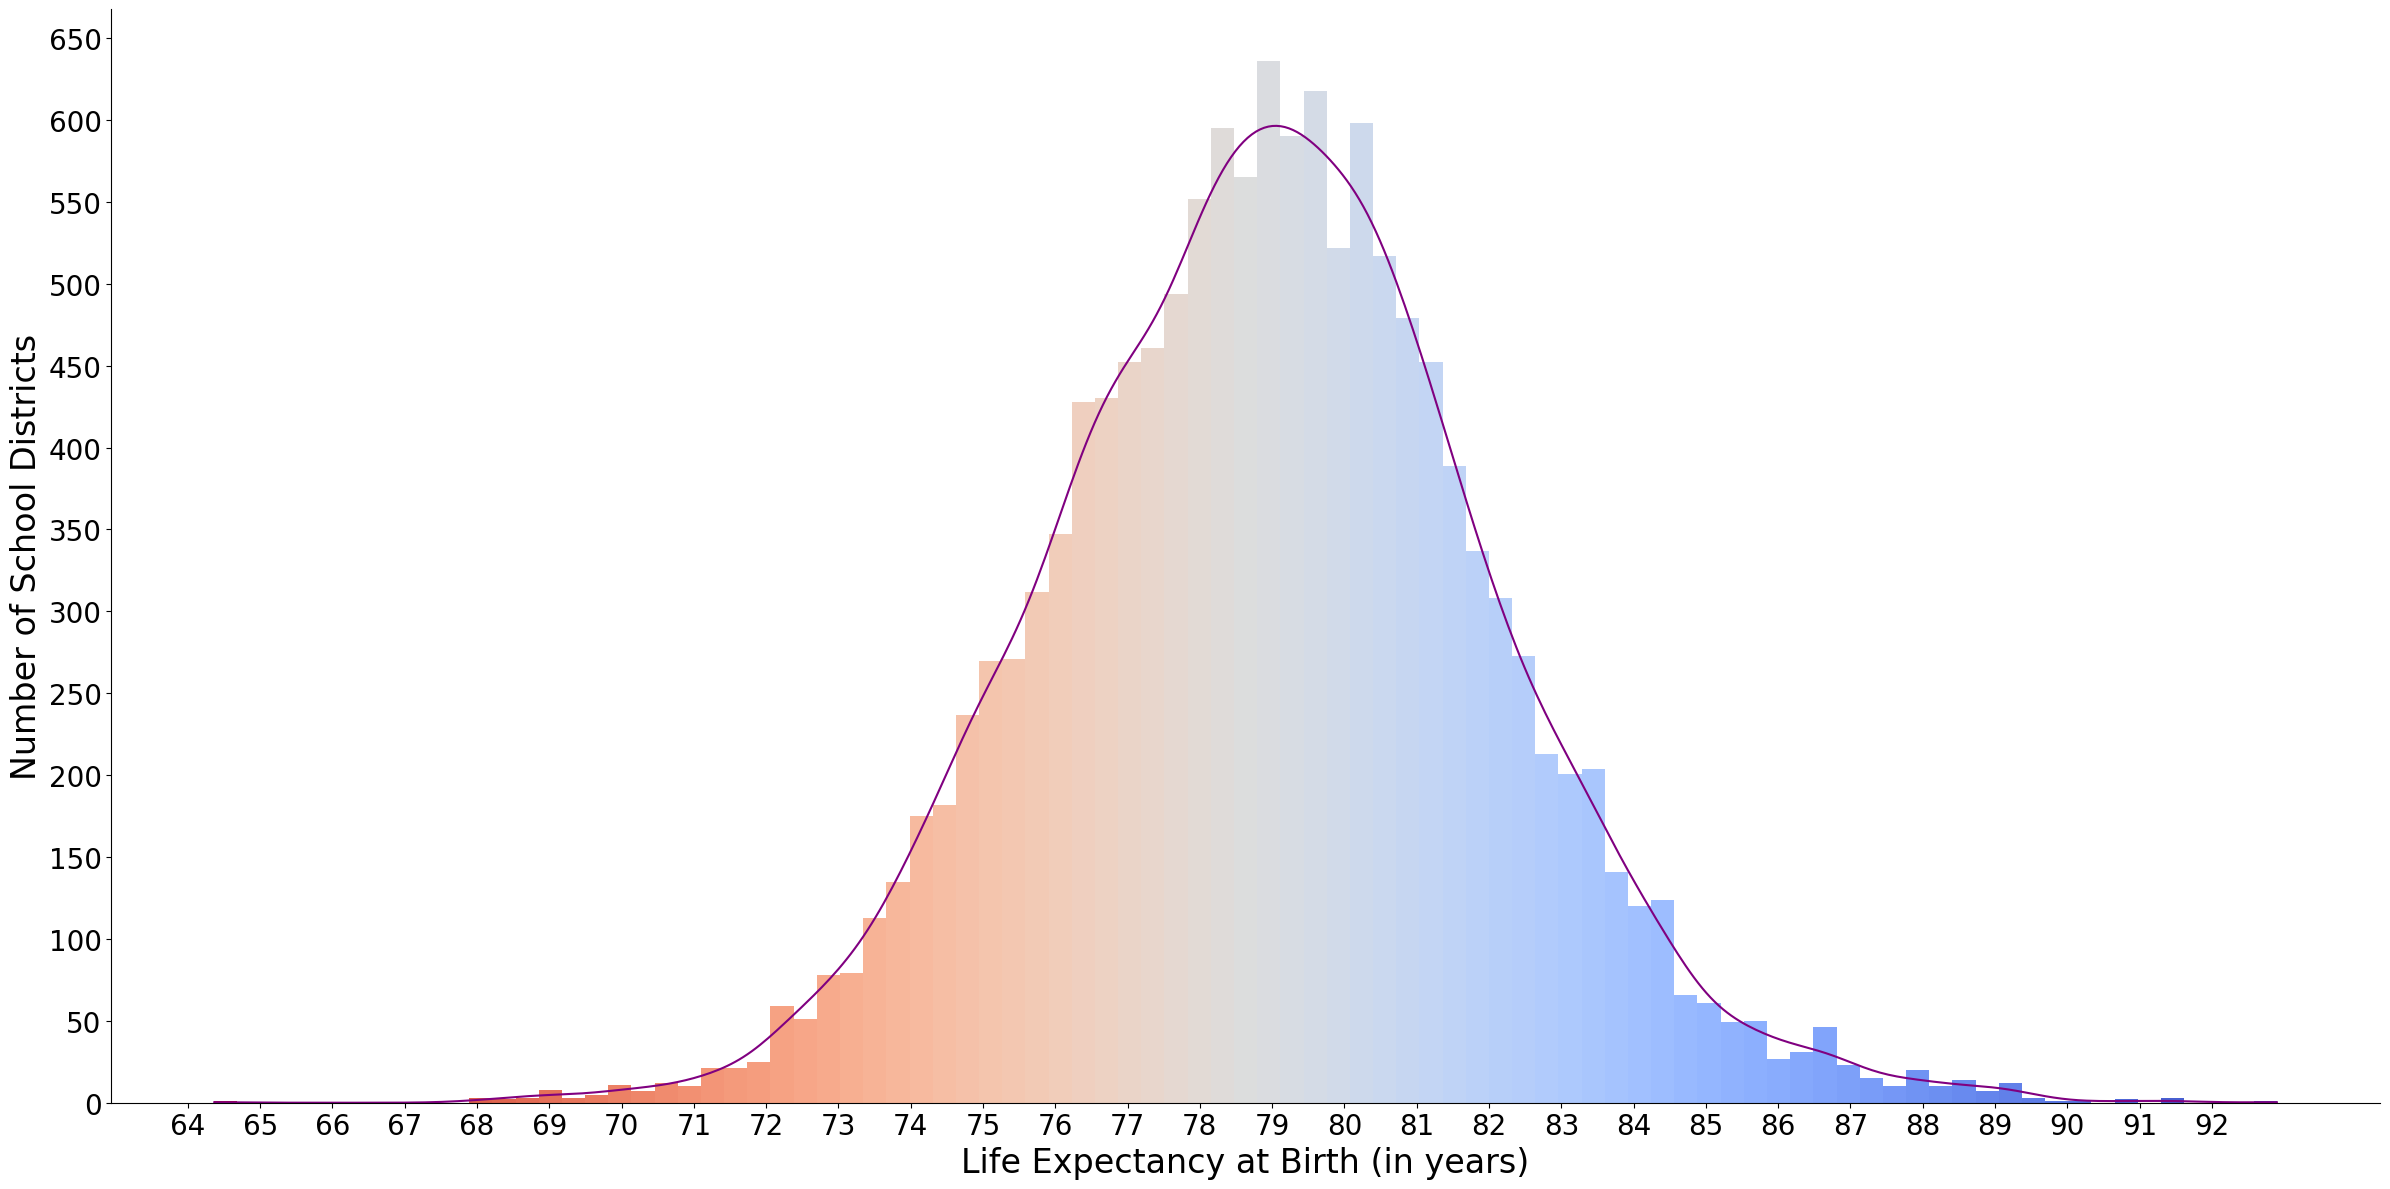

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy.stats import gaussian_kde

# Extract values and clean NaNs
le_values = df["E(X)_0_0y"].dropna()

# Calculate histogram data
counts, bins = np.histogram(le_values, bins=89)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Normalize for colormap
norm = Normalize(vmin=bin_centers.min(), vmax=bin_centers.max())
cmap = cm.get_cmap("coolwarm_r")

# Plot histogram manually
plt.figure(figsize=(24, 12))
for i in range(len(counts)):
    plt.bar(
        bin_centers[i], counts[i],
        width=bins[1] - bins[0],
        color=cmap(norm(bin_centers[i])),
        align='center'
    )

# KDE overlay with red curve
kde = gaussian_kde(le_values)
x_vals = np.linspace(le_values.min(), le_values.max(), 500)
y_vals = kde(x_vals) * len(le_values) * (bins[1] - bins[0])  # scale to histogram
plt.plot(x_vals, y_vals, color='purple', linewidth=1.5)

# Axis & formatting
plt.xlabel("Life Expectancy at Birth (in years)", fontsize=24)
plt.ylabel("Number of School Districts", fontsize=24)
plt.xticks(
    ticks=range(int(le_values.min()), int(le_values.max()) + 1, 1),
    fontsize=20
)
# Add more y-axis ticks
y_max = max(counts) * 1.1
plt.yticks(np.arange(0, y_max, step=50), fontsize=20)

# plt.title(
#     "Figure 2: Distribution of Life Expectancy at Birth (in years) Across School Districts in the United States, 2010",
#     fontsize=14
# )
plt.tight_layout()
sns.despine()
plt.show()


In [ ]:
df.columns

Index(['STATE', 'STATENAME', 'SDID', 'SDNAME', 'SDTYPE',
       'NEATLY_NESTED_TRACTS', 'TOTAL_TRACTS', 'E(X)_0_0y', 'E(X)_1_4y',
       'E(X)_5_14y', 'E(X)_15_24y', 'E(X)_25_34y', 'E(X)_35_44y',
       'E(X)_45_54y', 'E(X)_55_64y', 'E(X)_65_74y', 'E(X)_75_84y',
       'E(X)_85_upy', 'NQ(X)_0_0y', 'NQ(X)_1_4y', 'NQ(X)_5_14y',
       'NQ(X)_15_24y', 'NQ(X)_25_34y', 'NQ(X)_35_44y', 'NQ(X)_45_54y',
       'NQ(X)_55_64y', 'NQ(X)_65_74y', 'NQ(X)_75_84y', 'NQ(X)_85_upy',
       'L(X)_0_0y', 'L(X)_1_4y', 'L(X)_5_14y', 'L(X)_15_24y', 'L(X)_25_34y',
       'L(X)_35_44y', 'L(X)_45_54y', 'L(X)_55_64y', 'L(X)_65_74y',
       'L(X)_75_84y', 'L(X)_85_upy', 'ND(X)_0_0y', 'ND(X)_1_4y', 'ND(X)_5_14y',
       'ND(X)_15_24y', 'ND(X)_25_34y', 'ND(X)_35_44y', 'ND(X)_45_54y',
       'ND(X)_55_64y', 'ND(X)_65_74y', 'ND(X)_75_84y', 'ND(X)_85_upy',
       'NL(X)_0_0y', 'NL(X)_1_4y', 'NL(X)_5_14y', 'NL(X)_15_24y',
       'NL(X)_25_34y', 'NL(X)_35_44y', 'NL(X)_45_54y', 'NL(X)_55_64y',
       'NL(X)_65_74y', 'NL(

### Figure 2: Distribution of 2010 Life Expectancy at Birth Across School Districts by State, United States

In [1]:
import pandas as pd
df=pd.read_csv("school_district_summary_le_cleaned_ppop.csv")

#### Ordered by Median Life Expectancy (LE0)

/var/folders/df/6ly7fyfn1ds6r9brqjdcjjn00000gn/T/ipykernel_40448/190398840.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm_r")


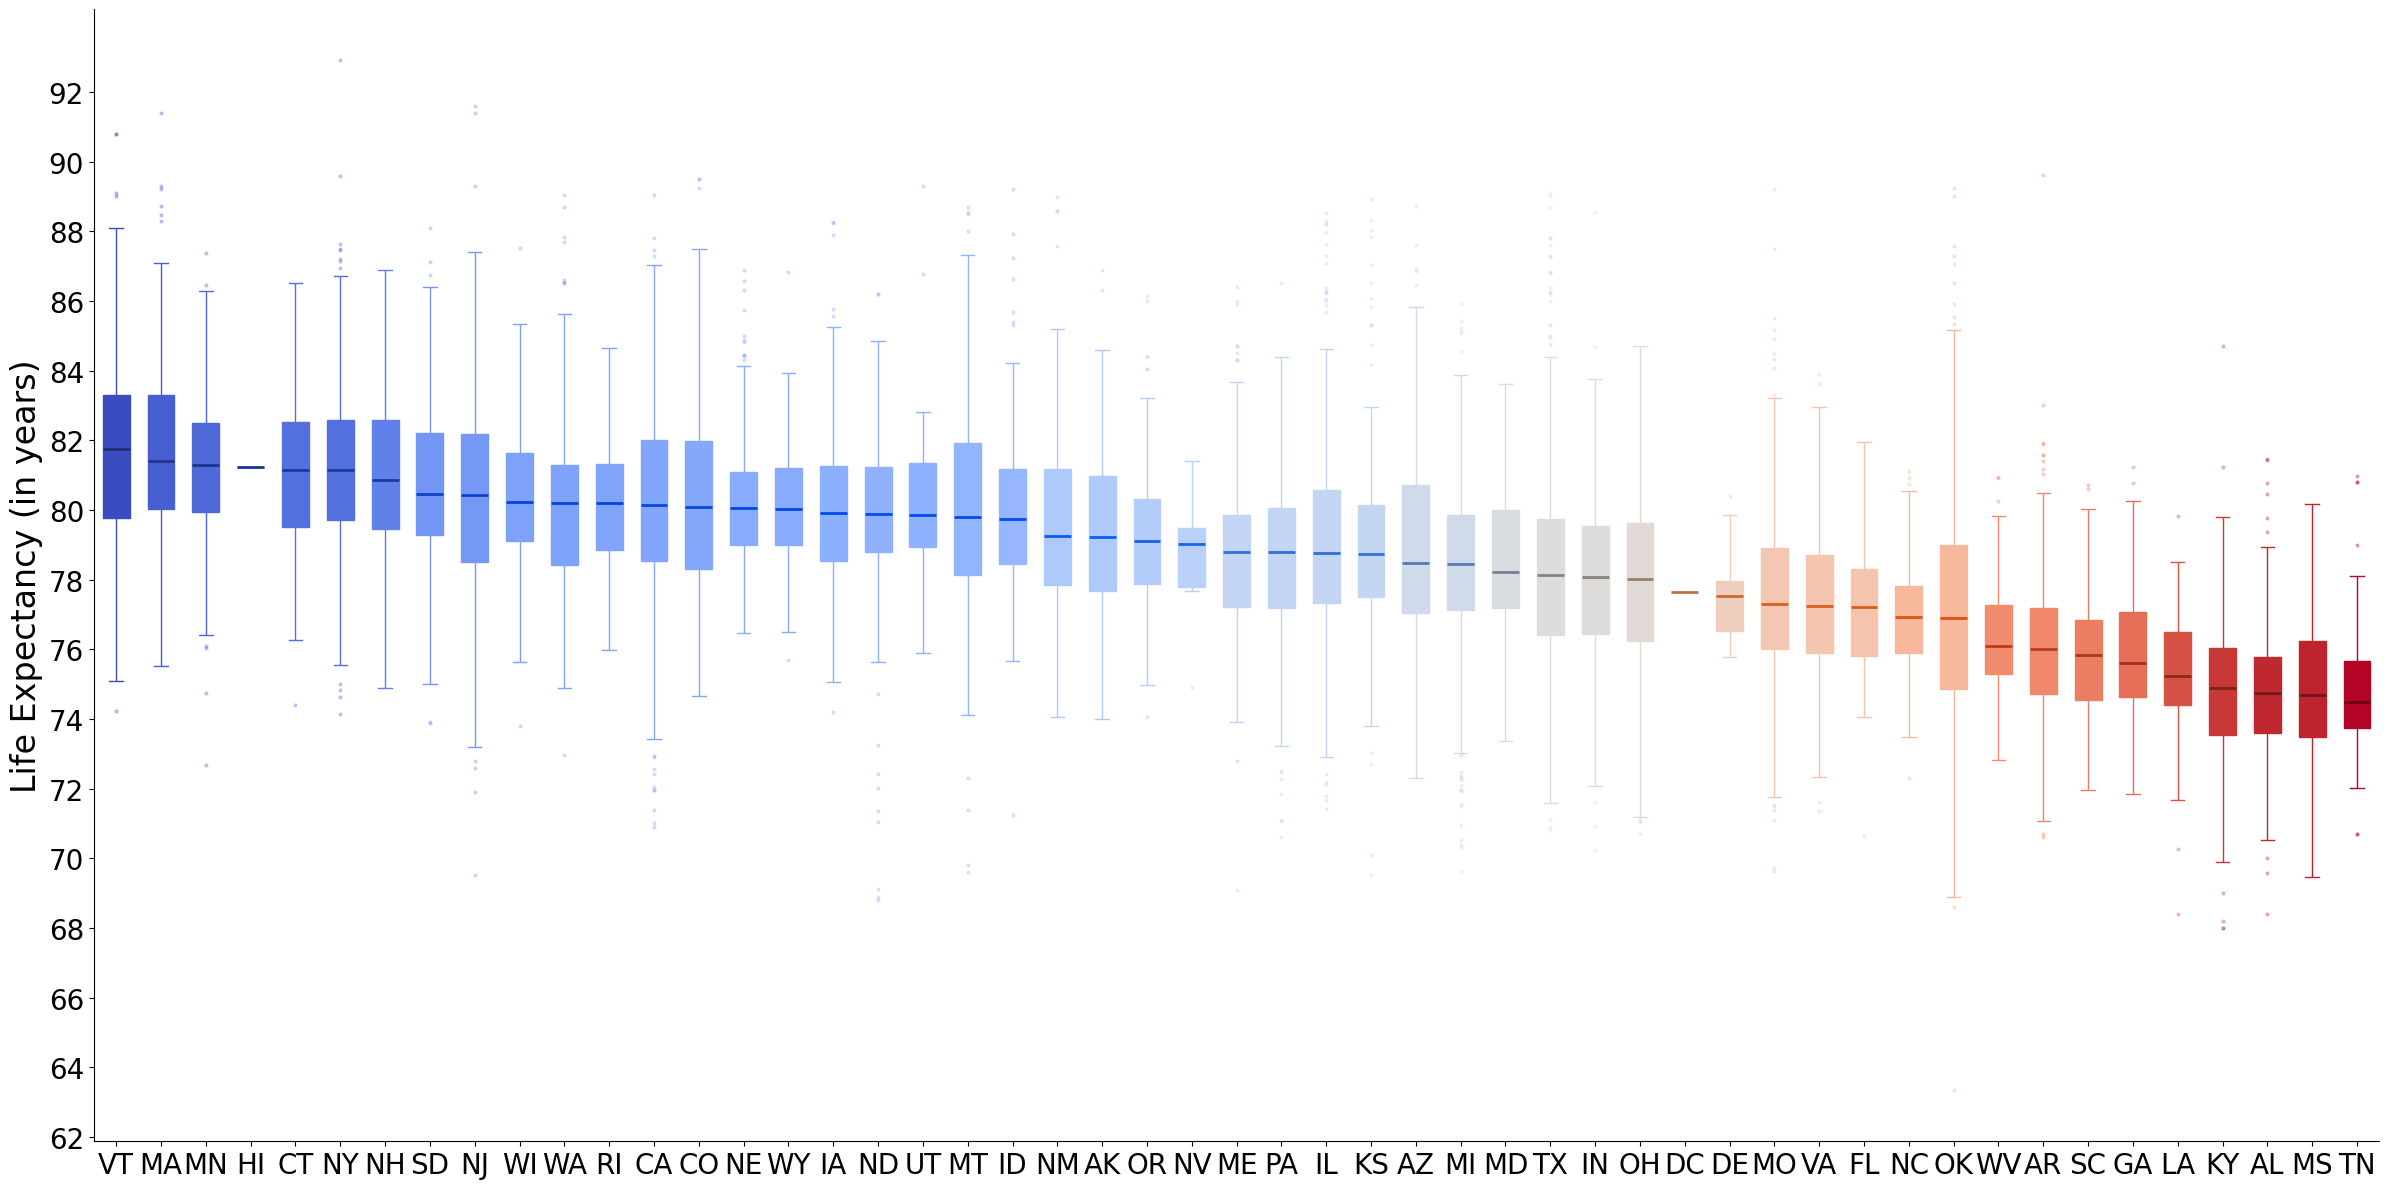

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import colorsys

# Helper to darken hex color
def darken_color(hex_color, amount=0.7):
    rgb = mcolors.hex2color(hex_color)
    h, l, s = colorsys.rgb_to_hls(*rgb)
    r, g, b = colorsys.hls_to_rgb(h, l * amount, s)
    return (r, g, b)

# Setup
plt.figure(figsize=(24, 12))
plt.rcParams.update({'xtick.labelsize': 20, 'ytick.labelsize': 20})

# Sort states
order = df.groupby("STATENAME")["E(X)_0_0y"].median().sort_values(ascending=False)
states = order.index
medians = order.values

# Normalize and map color
norm = mcolors.Normalize(vmin=medians.min(), vmax=medians.max())
cmap = cm.get_cmap("coolwarm_r")
colors = [mcolors.to_hex(cmap(norm(val))) for val in medians]

# Draw manually colored boxplots
for i, (state, color) in enumerate(zip(states, colors)):
    darker = darken_color(color, 0.6)
    sns.boxplot(
        data=df[df["STATENAME"] == state],
        y="E(X)_0_0y",
        x=np.full(len(df[df["STATENAME"] == state]), i),
        color=color,
        boxprops=dict(edgecolor=color, facecolor=color),
        medianprops=dict(color=darker, linewidth=2),
        whiskerprops=dict(color=color, linewidth=1),
        capprops=dict(color=color, linewidth=1),
        flierprops=dict(marker='o', markersize=2, alpha=0.3,
                        markerfacecolor=color, markeredgecolor=color),
        width=0.6
    )

# Customize axes
plt.xticks(ticks=np.arange(len(states)), labels=states, rotation=0)
plt.yticks(np.arange(int(df["E(X)_0_0y"].min()) - 1, int(df["E(X)_0_0y"].max()) + 2, 2))
plt.ylabel("Life Expectancy (in years)", fontsize=24)
# plt.title(
#     "Figure 1: Distribution of Life Expectancy at Birth (in years) Across School Districts by State in the United States, 2010",
#     fontsize=14
# )

sns.despine()
plt.tight_layout()
# plt.figtext(
#     0.5, -0.03,
#     "Note: Box shows interquartile range (25th–75th percentile), line = median, whiskers = range within 1.5×IQR, points beyond are outliers.",
#     wrap=True, horizontalalignment='center', fontsize=16
# )
plt.show()

In [ ]:
median_le = df["E(X)_0_0y"].median()
rounded_median= round(median_le, 1)
rounded_median

79.0

In [ ]:
rounded_mean=df["E(X)_0_0y"].mean()
rounded_mean

78.97332193612336

#### Ordered by Interquartile Range (IQR)

/var/folders/df/6ly7fyfn1ds6r9brqjdcjjn00000gn/T/ipykernel_40448/4044641579.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm_r")                      # blue = higher IQR, red = lower IQR


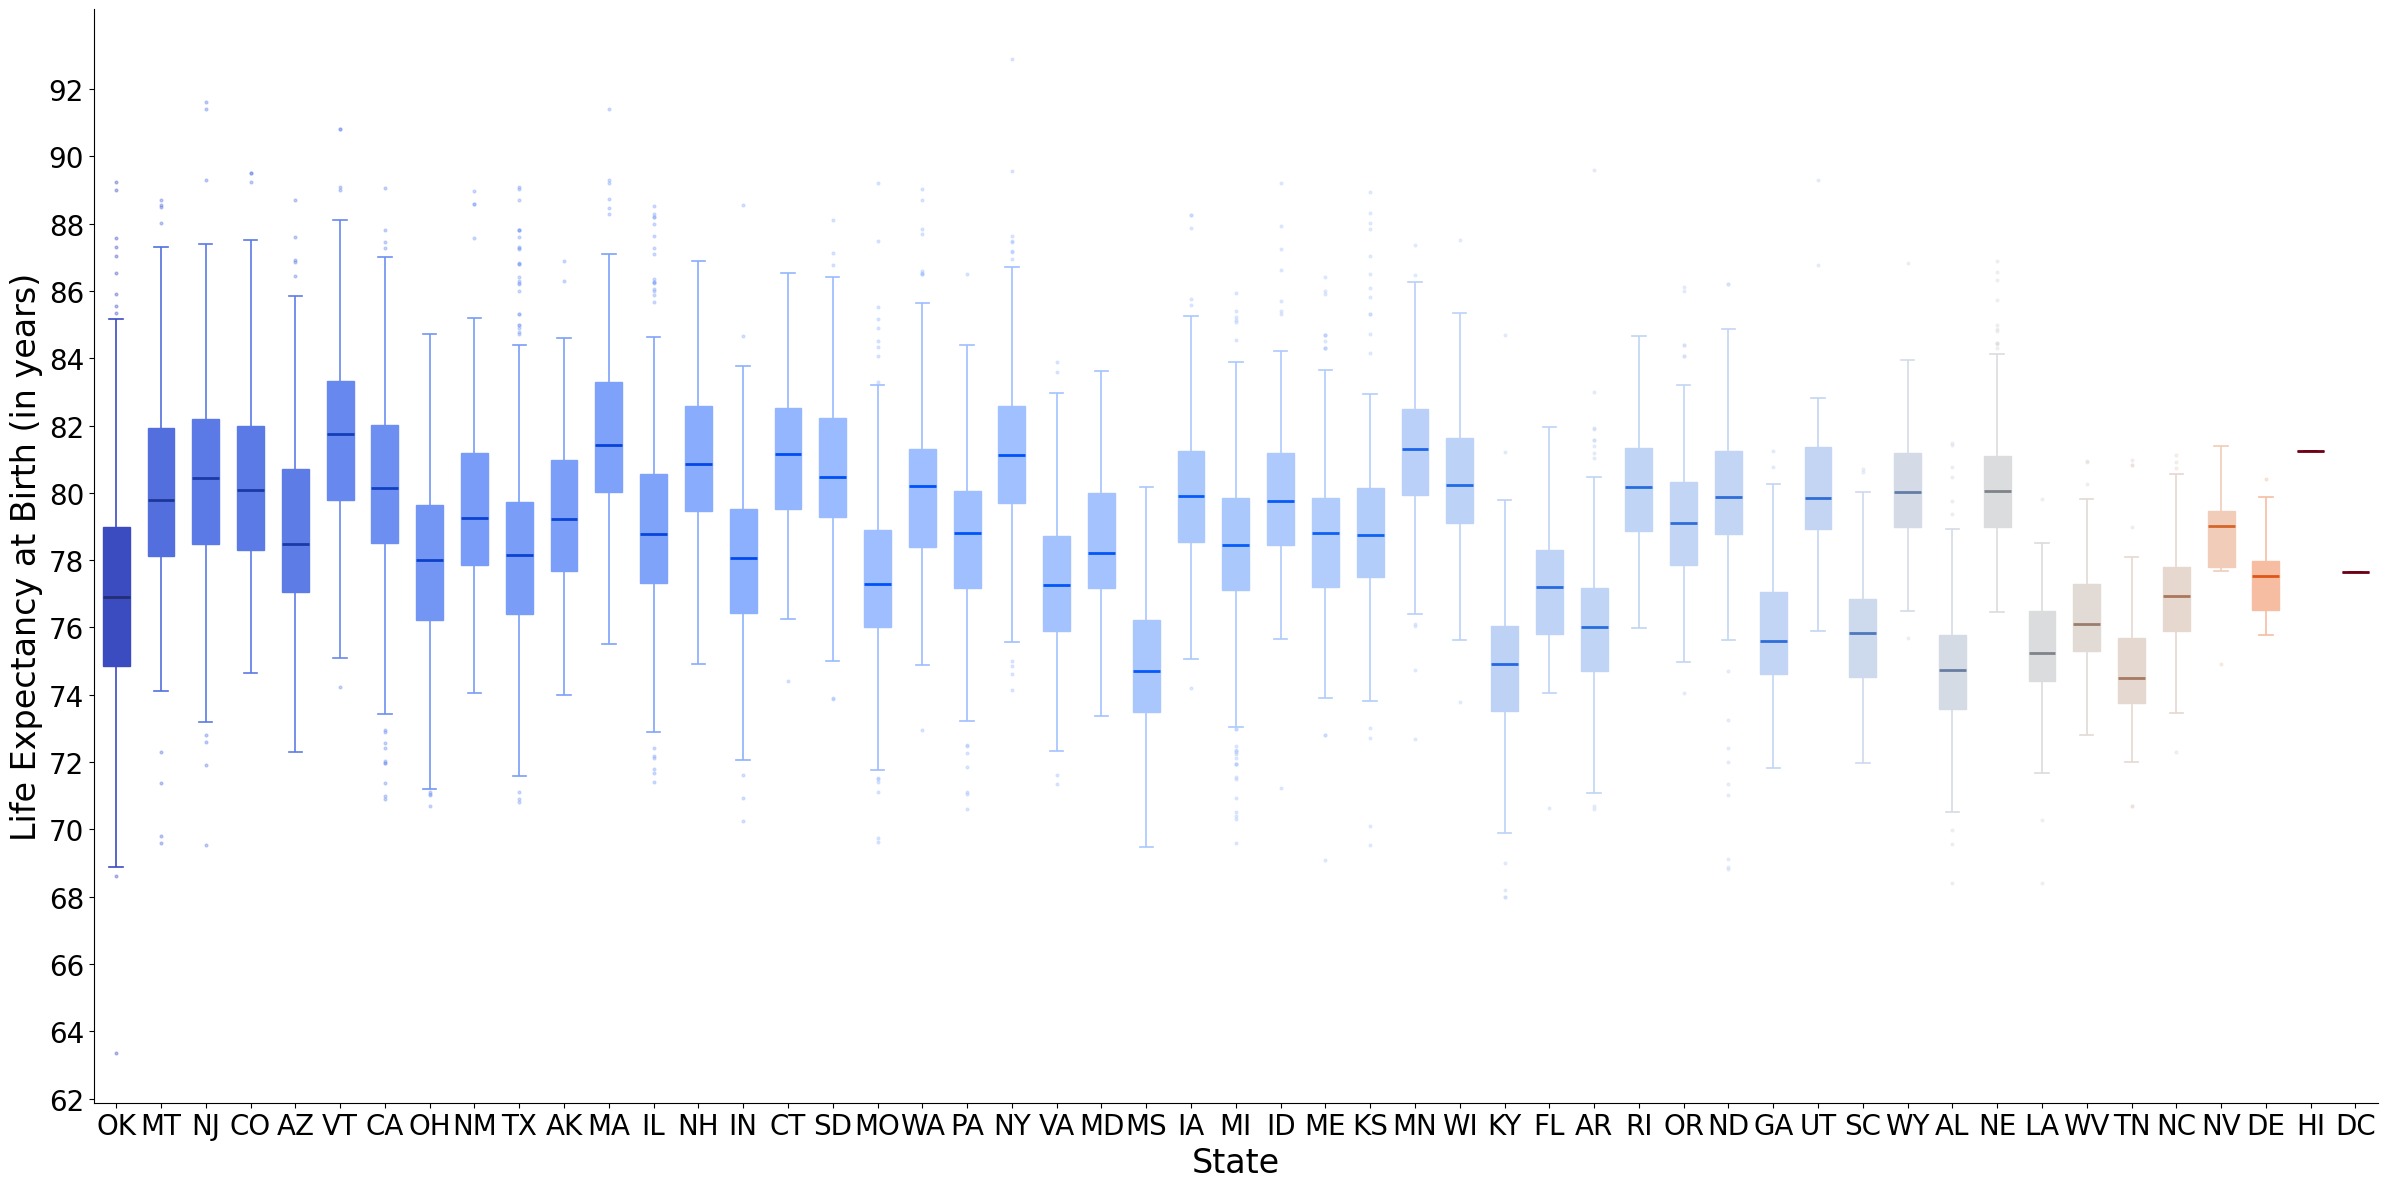

In [10]:
# ==== Figure 4: Life Expectancy at Birth by State — ordered & colored by IQR ====
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import colorsys
import pandas as pd

# df must contain columns: STATENAME (state), E(X)_0_0y (life expectancy at birth)

# ---- helper: darken a hex color ----
def darken_color(hex_color, amount=0.6):
    r, g, b = mcolors.hex2color(hex_color)
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    rd, gd, bd = colorsys.hls_to_rgb(h, l * amount, s)
    return (rd, gd, bd)

# ---- compute IQR by state & order ----
grp = df.groupby("STATENAME")["E(X)_0_0y"]
iqr = grp.quantile(0.75) - grp.quantile(0.25)         # IQR per state
order = iqr.sort_values(ascending=False).index        # largest → smallest IQR

# ---- color map based on IQR ----
vals = iqr[order].values
norm = mcolors.Normalize(vmin=vals.min(), vmax=vals.max())
cmap = cm.get_cmap("coolwarm_r")                      # blue = higher IQR, red = lower IQR
state_color = {st: mcolors.to_hex(cmap(norm(iqr[st]))) for st in order}

# ---- plotting ----
plt.figure(figsize=(24, 12))
plt.rcParams.update({'xtick.labelsize': 20, 'ytick.labelsize': 20})

# loop so each state's box, whiskers, caps, median use its own color
# (seaborn can't set per-box median color in a single call)
for i, st in enumerate(order):
    sub = df.loc[df["STATENAME"] == st, ["STATENAME", "E(X)_0_0y"]]
    color = state_color[st]
    darker = darken_color(color, 0.6)

    sns.boxplot(
        data=sub,
        x=np.full(len(sub), i),                       # fixed x-position
        y="E(X)_0_0y",
        color=color,
        boxprops=dict(edgecolor=color, facecolor=color),
        medianprops=dict(color=darker, linewidth=2.0),
        whiskerprops=dict(color=color, linewidth=1.2),
        capprops=dict(color=color, linewidth=1.2),
        flierprops=dict(marker='o', markersize=2, alpha=0.35,
                        markerfacecolor=color, markeredgecolor=color),
        width=0.6
    )

# ---- axes/labels ----
plt.xticks(ticks=np.arange(len(order)), labels=order, rotation=0)
min_y = int(df["E(X)_0_0y"].min()) - 1
max_y = int(df["E(X)_0_0y"].max()) + 1
plt.yticks(np.arange(min_y, max_y + 1, 2))
plt.xlabel("State", fontsize=24)
plt.ylabel("Life Expectancy at Birth (in years)", fontsize=24)

sns.despine()
plt.tight_layout()
plt.show()

#### Table 1: Summary of School Districts by State in 2010, United States

In [ ]:
master_ct10usaleep_noPR_detailed=pd.read_csv("master_ct10usaleep_noPR_detailed.csv", dtype=str)
master_ct10usaleep_noPR_detailed.describe(include='all')

,BLOCKID,TRACTID,SDUNI,SDELM,SDSEC,POP10,USALEEP,STATE,COUNTY,STATENAME,COUNTYNAME,SDUNI_NAME,SDELM_NAME,SDSEC_NAME
count,11078297,11078297,10346127,732170,632917,11078297,10508090,11078297,11078297,11078297,11078297,10346127,731880,632917
unique,11078297,73057,10891,2304,514,2649,320,51,324,51,1877,10355,2235,514
top,280010001001000,16015950200,1709930,0409600,0619540,0.0,77.6,48,031,TX,Jefferson County,Chicago Public School District 299,Yuma Elementary District,Kern Union High School District
freq,1,3449,46311,4895,15440,4871270,137279,914231,271330,914231,124184,46311,4895,15440


In [ ]:
import pandas as pd

# STEP 1: Create SDID from SDUNI/SDELM/SDSEC
df = master_ct10usaleep_noPR_detailed.copy()

In [ ]:
school_district_summary_le_weighted_new_ppop=pd.read_csv("school_district_summary_le_weighted_new_ppop.csv", dtype=str)

In [ ]:
df.columns

Index(['BLOCKID', 'TRACTID', 'SDUNI', 'SDELM', 'SDSEC', 'POP10', 'USALEEP',
       'STATE', 'COUNTY', 'STATENAME', 'COUNTYNAME', 'SDUNI_NAME',
       'SDELM_NAME', 'SDSEC_NAME'],
      dtype='object')

In [ ]:
df['POP10'] = pd.to_numeric(df['POP10'], errors='coerce')
df['POP10'].sum()

308745538.0

In [ ]:
# Step 1: Melt all 3 types into one SDID column
df_all = pd.melt(
    df,
    id_vars=["STATE", "STATENAME", "TRACTID", "BLOCKID", "POP10"],
    value_vars=["SDUNI", "SDELM", "SDSEC"],
    var_name="SDTYPE", value_name="SDID"
)

In [ ]:
df_all.dropna(subset=["SDID"], inplace=True)
df_all.describe(include='all')

,STATE,STATENAME,TRACTID,BLOCKID,POP10,SDTYPE,SDID
count,11711214,11711214,11711214,11711214,1.171121e+07,11711214,11711214
unique,51,51,73057,11078297,NaN,3,13709
top,06,CA,30029000100,500279665004142,NaN,SDUNI,1709930
freq,929448,929448,4186,2,NaN,10346127,46311
mean,NaN,NaN,NaN,NaN,2.821036e+01,NaN,NaN
std,NaN,NaN,NaN,NaN,7.906999e+01,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.800000e+01,NaN,NaN


In [ ]:
df_all=df_all[df_all['SDID'].isin(school_district_summary_le_weighted_new_ppop['SDID'])]
df_all.describe(include='all')

,STATE,STATENAME,TRACTID,BLOCKID,POP10,SDTYPE,SDID
count,11675467,11675467,11675467,11675467,1.167547e+07,11675467,11675467
unique,51,51,72977,11047425,NaN,3,13592
top,06,CA,06029003304,300470001001196,NaN,SDUNI,1709930
freq,929163,929163,4008,2,NaN,10318541,46311
mean,NaN,NaN,NaN,NaN,2.827249e+01,NaN,NaN
std,NaN,NaN,NaN,NaN,7.913570e+01,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.800000e+01,NaN,NaN


In [ ]:
# Step 3: Identify neatly nested tracts
tract_counts = df_all.groupby(["STATE", "TRACTID"])["SDID"].nunique().reset_index(name="n_sdids")
df_all = df_all.merge(tract_counts, on=["STATE", "TRACTID"], how="left")
df_all["is_neatly_nested"] = df_all["n_sdids"] == 1

df_unique_tract = df_all.drop_duplicates(subset=["STATE", "TRACTID"])

summary = df_all.groupby("STATENAME").agg(
    school_districts=("SDID", "nunique"),
    tracts=("TRACTID", "nunique")
).reset_index()

neatly_nested = df_unique_tract.groupby("STATENAME")["is_neatly_nested"].sum().reset_index(name="neatly_nested_tracts")

summary = summary.merge(neatly_nested, on="STATENAME", how="left")
summary["cross_nested_tracts"] = summary["tracts"] - summary["neatly_nested_tracts"]

# Step 5: Block-level summary (deduplicate BLOCKID to avoid population overcount)
df_unique_block = df_all.drop_duplicates(subset=["STATE", "BLOCKID"])

block_stats = df_unique_block.groupby("STATENAME").agg(
    blocks=("BLOCKID", "nunique"),
    population=("POP10", lambda x: pd.to_numeric(x, errors="coerce").sum(min_count=1))
).reset_index()

# Step 6: Merge
summary = summary.merge(block_stats, on="STATENAME", how="left")

# Step 7: Add US row
us_row = summary.drop(columns="STATENAME").sum(numeric_only=True)
us_row["STATENAME"] = "United States"
summary = pd.concat([pd.DataFrame([us_row]), summary], ignore_index=True)

# Step 8: Rename columns
summary = summary.rename(columns={
    "STATENAME": "State",
    "school_districts": "School Districts (N)",
    "tracts": "Tracts (N)",
    "neatly_nested_tracts": "Neatly Nested Tracts (N)",
    "cross_nested_tracts": "Cross-Nested Tracts (N)",
    "blocks": "Blocks (N)",
    "population": "Population (N)"
})

# Step 9: Convert numeric columns to integers
int_cols = summary.select_dtypes(include=["float", "int"]).columns
summary[int_cols] = summary[int_cols].fillna(0).astype(int)

summary

,School Districts (N),Tracts (N),Neatly Nested Tracts (N),Cross-Nested Tracts (N),Blocks (N),Population (N),State
0,13592,72977,51860,21117,11047425,308525346,United States
1,48,165,145,20,43018,700284,AK
2,133,1181,705,476,252155,4777222,AL
3,251,686,268,418,186211,2915918,AR
4,213,1525,743,782,240209,6381469,AZ
5,984,8055,4722,3333,709972,37253630,CA
6,176,1247,985,262,200348,5027785,CO
7,163,830,784,46,67174,3564718,CT
8,1,179,179,0,6507,601723,DC
9,16,218,139,79,24115,897934,DE


In [ ]:
# US state abbreviation to full name mapping
state_name_map = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming",
    "DC": "District of Columbia",
    "United States": "United States"
}

# Replace abbreviations in 'State' column
summary["State"] = summary["State"].replace(state_name_map)
summary

,School Districts (N),Tracts (N),Neatly Nested Tracts (N),Cross-Nested Tracts (N),Blocks (N),Population (N),State
0,13592,72977,51860,21117,11047425,308525346,United States
1,48,165,145,20,43018,700284,Alaska
2,133,1181,705,476,252155,4777222,Alabama
3,251,686,268,418,186211,2915918,Arkansas
4,213,1525,743,782,240209,6381469,Arizona
5,984,8055,4722,3333,709972,37253630,California
6,176,1247,985,262,200348,5027785,Colorado
7,163,830,784,46,67174,3564718,Connecticut
8,1,179,179,0,6507,601723,District of Columbia
9,16,218,139,79,24115,897934,Delaware


In [ ]:
# Move "State" column to the front
cols = summary.columns.tolist()
cols.remove("State")
summary = summary[["State"] + cols]
summary

,State,School Districts (N),Tracts (N),Neatly Nested Tracts (N),Cross-Nested Tracts (N),Blocks (N),Population (N)
0,United States,13592,72977,51860,21117,11047425,308525346
1,Alaska,48,165,145,20,43018,700284
2,Alabama,133,1181,705,476,252155,4777222
3,Arkansas,251,686,268,418,186211,2915918
4,Arizona,213,1525,743,782,240209,6381469
5,California,984,8055,4722,3333,709972,37253630
6,Colorado,176,1247,985,262,200348,5027785
7,Connecticut,163,830,784,46,67174,3564718
8,District of Columbia,1,179,179,0,6507,601723
9,Delaware,16,218,139,79,24115,897934
